# TransCanada Phishing State in 2019

## Phishing Report data by Wombat

### User Failure vs Phishing Campaign 


In [2]:
import pandas as pd
pd.__version__

'0.23.4'

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
# the data set comes from Phishing User Failure Data set
phishing_data = pd.read_csv("data/TC_Phishing_Data.csv",encoding='latin-1')

In [16]:
# what does each row represent?
phishing_data.head()

First Name      Last Name                             Mail Last Event Date  \
0    Anoshan  Anharakumaran  a_anharakumaran@transcanada.com       5/16/2018   
1    Anthony  Heywood-Smith  a_heywood-smith@transcanada.com       9/13/2018   
2      Aaron        Carnell    aaron_carnell@transcanada.com       6/28/2018   
3      Aaron         Carper     aaron_carper@transcanada.com       8/21/2018   
4      Aaron        Crismas    aaron_crismas@transcanada.com       9/13/2018   

   Campaign Count  Campaign Failures Overall Failure Rate  \
0               8                  1               12.50%   
1               8                  2               25.00%   
2               8                  1               12.50%   
3               8                  1               12.50%   
4               8                  1               12.50%   

  Drive By Campaign Failure Rate Data Entry Campaign Failure Rate  \
0                         20.00%                            0.00%   
1                         20.00%                            0.00%   
2                          0.00%                            0.00%   
3                          0.00%                            0.00%   
4                         20.00%                            0.00%   

  Attachment Campaign Failure Rate  
0                            0.00%  
1                          100.00%  
2                          100.00%  
3                          100.00%  
4                            0.00%

In [15]:
# what do these numbers mean?
phishing_data.shape

(5661, 10)

In [17]:
# the data set comes from Phishing User Failure Data set
org_chart = pd.read_csv("data/TC_Org_Chart.csv",encoding='latin-1')

In [18]:
# what does each row represen
org_chart.head()

First name: Known As Name       Last name:                  Name  \
0        Adam           NaN  Moriyama-Bondar  Adam Moriyama-Bondar   
1    Adrienne           NaN           Watson       Adrienne Watson   
2      Amanda           NaN           Sharif         Amanda Sharif   
3         Amy           NaN           Cooper            Amy Cooper   
4        Ania           NaN          Mueller          Ania Mueller   

                              Mail Worker Type Authorized Spending Limit  \
0      adam_bondar@transcanada.com         NaN                       NaN   
1  adrienne_watson@transcanada.com         NaN                       NaN   
2    amanda_sharif@transcanada.com         NaN                       NaN   
3       amy_cooper@transcanada.com         NaN                       NaN   
4     ania_mueller@transcanada.com         NaN                       NaN   

  ASL Start Date ASL End Date Active /Inactive        ...         \
0            NaN          NaN       1-Inactive        ...          
1            NaN          NaN       1-Inactive        ...          
2            NaN          NaN       1-Inactive        ...          
3            NaN          NaN       1-Inactive        ...          
4            NaN          NaN       1-Inactive        ...          

       Manages Org unit Text  Leader's Position #  \
0                        NaN           50088679.0   
1                        NaN           90033254.0   
2                        NaN           90009713.0   
3                        NaN           50086266.0   
4  Program Management Office           90015822.0   

                     Leader's Email            Leader             ELT  \
0  SIGFRID_SANTIAGO@TRANSCANADA.COM  Sigfrid Santiago   Paul E Miller   
1        TRAN_HUYNH@TRANSCANADA.COM        Tran Huynh  Wendy Hanrahan   
2    KENT_RAINVILLE@TRANSCANADA.COM    Kent Rainville  Wendy Hanrahan   
3       GRANT_KUNTZ@TRANSCANADA.COM       Grant Kuntz  Tracy Robinson   
4    GILLIAN_DAVIES@TRANSCANADA.COM    Gillian Davies  Tracy Robinson   

        Rpt Mgr 1           Rpt Mrg 2         Rpt Mgr 3         Rpt Mgr 4  \
0   Paul E Miller       Norrie Ramsay       Sonya Kirby  Nicole Remillard   
1  Wendy Hanrahan  Christopher Foster     Shane Healing    James Mausberg   
2  Wendy Hanrahan      Andrea Jalbert    Kristena Hirak    Kent Rainville   
3  Tracy Robinson              VACANT  Stephanie Wilson       Alex Harris   
4  Tracy Robinson       Nancy Johnson    Gillian Davies               NaN   

          Rpt Mgr 5  
0  Sigfrid Santiago  
1        Tran Huynh  
2               NaN  
3       Grant Kuntz  
4               NaN  

[5 rows x 39 columns]

In [29]:
# what do these numbers mean?
org_chart.shape

(11526, 39)

In [36]:
user_failed = pd.merge(phishing_data,org_chart,how='left')

In [37]:
user_failed.columns

Index(['First Name', 'Last Name', 'Mail', 'Last Event Date', 'Campaign Count',
       'Campaign Failures', 'Overall Failure Rate',
       'Drive By Campaign Failure Rate', 'Data Entry Campaign Failure Rate',
       'Attachment Campaign Failure Rate', 'First name:', 'Known As Name',
       'Last name:', 'Name', 'Worker Type', 'Authorized Spending Limit',
       'ASL Start Date', 'ASL End Date', 'Active /Inactive', 'Company Text',
       'Profit Centre', 'Profit Centre Text', 'Cost Center:',
       'Cost Centre Text', 'Work Location Code:', 'Work Location:', 'Floor #',
       'Work Location Address', 'City:', 'Province / State:',
       'Postal / Zip code', 'Country', 'Phone:', 'Belong to Org Unit #',
       'Belong to Org Unit Text', 'Position #:', 'Employee Role',
       'Manages Org unit #', 'Manages Org unit Text', 'Leader's Position #',
       'Leader's Email', 'Leader', 'ELT', 'Rpt Mgr 1', 'Rpt Mrg 2',
       'Rpt Mgr 3', 'Rpt Mgr 4', 'Rpt Mgr 5'],
      dtype='object')

In [38]:
user_failed.shape

(5661, 48)

In [39]:
# what do these types mean?
user_failed.dtypes

First Name                           object
Last Name                            object
Mail                                 object
Last Event Date                      object
Campaign Count                        int64
Campaign Failures                     int64
Overall Failure Rate                 object
Drive By Campaign Failure Rate       object
Data Entry Campaign Failure Rate     object
Attachment Campaign Failure Rate     object
First name:                          object
Known As Name                        object
Last name:                           object
Name                                 object
Worker Type                          object
Authorized Spending Limit            object
ASL Start Date                       object
ASL End Date                         object
Active /Inactive                     object
Company Text                         object
Profit Centre                       float64
Profit Centre Text                   object
Cost Center:                    

In [42]:
user_failed.Mail.count()

5661

In [54]:
user_failed[(user_failed.Name.isnull())]

First Name          Last Name                                 Mail  \
14              Aaron            Whitney        aaron_whitney@transcanada.com   
26           Abelardo               Soto        abelardo_soto@transcanada.com   
31            Abigail            McGuire      abigail_mcguire@transcanada.com   
32       Abril Johana        Pardo Rueda          abril_pardo@transcanada.com   
54               Adam            Wyonzek         adam_wyonzek@transcanada.com   
59             Adrian  Ramirez Alejandro       adrian_ramirez@transcanada.com   
90           Kyungsub                Kim             alan_kim@transcanada.com   
93             Alanna            Simmons       alanna_simmons@transcanada.com   
96             Albert            Tomblin       albert_tomblin@transcanada.com   
102   Alberto Gabriel         Perez Lara        alberto_perez@transcanada.com   
107         Alejandro       Aguilar Lara    alejandro_aguilar@transcanada.com   
109         Alejandro              Carpy      alejandro_carpy@transcanada.com   
110         Alejandro     Dudnikow Power   alejandro_dudnikow@transcanada.com   
123              Alex                Hui             alex_hui@transcanada.com   
133         Alexander             Stover          alex_stover@transcanada.com   
138         Alexander                Lam        alexander_lam@transcanada.com   
140            Angela          Gutierrez  alexandra_gutierrez@transcanada.com   
151           Alfredo             Najera       alfredo_najera@transcanada.com   
152           Alfredo            Saucedo      alfredo_saucedo@transcanada.com   
153           Alfredo               Vela         alfredo_vela@transcanada.com   
154               Ali             Arslan           ali_arslan@transcanada.com   
162            Alison             Goulet        alison_goulet@transcanada.com   
167             Allan              Latka          allan_latka@transcanada.com   
168             Allan              Price          allan_price@transcanada.com   
175           Unknown            Unknown   allison_duck_chief@transcanada.com   
177              Alma              Muniz           alma_muniz@transcanada.com   
184            Huaqiu                Liu           alyssa_liu@transcanada.com   
194             Amber               Wall           amber_wall@transcanada.com   
204        Amiteshwar             Aulakh          amit_aulakh@transcanada.com   
205          Muhammad              Irfan          ammar_irfan@transcanada.com   
...               ...                ...                                  ...   
5462           Victor              Lopez         victor_lopez@transcanada.com   
5468         Victoria            Pfeifer     victoria_pfeifer@transcanada.com   
5471            Vidya        Venkatraman    vidya_venkatraman@transcanada.com   
5474            Vijay           Desiraju       vijay_desiraju@transcanada.com   
5475           Vikram             Jalali        vikram_jalali@transcanada.com   
5481          Vincent                Lee          vincent_lee@transcanada.com   
5491           Vivian               Bain          vivian_bain@transcanada.com   
5494              Von               Cruz             von_cruz@transcanada.com   
5496          Winston      Cormier-Smith      w_cormier-smith@transcanada.com   
5511           Walter            Frazier       walter_frazier@transcanada.com   
5515           Walter           Spahmann      walter_spahmann@transcanada.com   
5517            Wanda           McCarthy       wanda_mccarthy@transcanada.com   
5522           Warren               Getz          warren_getz@transcanada.com   
5536            Wendy              Frost          wendy_frost@transcanada.com   
5542              Wes             Fehler           wes_fehler@transcanada.com   
5552         Wilfredo           Amoretti    wilfredo_amoretti@transcanada.com   
5561          William               Tuer            will_tuer@transcanada.com   
5575          William             Fuller  

In [28]:
user_failed['Cost Centre Text'].value_counts()

Gas Proj Project MX     169
USNG Safety & Qual       56
Construction Mgmt        56
Gas Proj Engineering     54
USNG GPMC West           51
USNG GPMC East Mod       43
USNG Gas Control W       42
KXL CAD Dev Project      42
USNG Growth & Devel      41
USNG Nominat&Schedul     36
USTS Mntce Prog&Plan     35
Facilities Ser Clgry     33
USNG Gas Contrl East     32
PI Constructn Mgmt       31
CGL Project Services     29
KXL Facilities US        27
USNG Trans Acc&Contr     26
USTS Measure Serv        26
SEOA7: Bus Ops           24
Energy Napanee           23
Document Management      23
EOA1: Bus Ops            23
USNG Proj Tech Srv       22
USNG XP Proj Clse US     22
USNG Con Serv West       22
IS EITS                  22
COA4: Bus Ops            21
COA1: Bus Ops            21
Canada Gas Control       21
CGO CP Proj and Eng      20
                       ... 
Gas Proj MX Houston       1
CA Imp Gas Facilitie      1
CA Pipe Reg Affairs       1
PI Tech Managment         1
SCCO Energy CA      

In [35]:
user_failed['Rpt Mgr 1'].value_counts()

Stanley Chapman III    1552
Tracy Robinson          959
Wendy Hanrahan          707
Paul E Miller           588
Francois Poirier        392
Kristine Delkus         338
Donald Marchand         214
Name: Rpt Mgr 1, dtype: int64

In [123]:
# what do these types mean?
user_failed.dtypes

First Name                          object
Last Name                           object
Email Address                       object
Department                          object
Active                              object
lvl1                                object
lv2                                 object
lv3                                 object
lv4                                 object
lv5                                 object
Campaign Count                       int64
Campaign Failures                    int64
Overall Failure Rate                object
Drive By Campaign Failure Rate      object
Data Entry Campaign Failure Rate    object
Attachment Campaign Failure Rate    object
Last Event Date                     object
dtype: object

Text(0.5, 0, 'Number of Failures')

Text(0, 0.5, 'Number of Users')

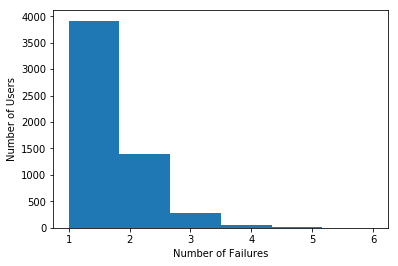

In [124]:
# try more bins
user_failed["Campaign Failures"].plot(kind='hist', bins=6)
plt.xlabel('Number of Failures')
plt.ylabel('Number of Users')

In [125]:
# converting dtypes using astype 
user_failed["Campaign Count"]= user_failed["Campaign Count"].astype(int)
user_failed["Campaign Failures"]= user_failed["Campaign Failures"].astype(int)

In [126]:
# convert from percentage to numbers
# user_failed["Overall Failure Rate"].str.rstrip('%').astype('float') / 100.0
user_failed["Overall Failure Rate"] = user_failed["Overall Failure Rate"].astype('str').str.rstrip('%').astype('float') / 100.0

In [127]:
user_failed["Drive By Campaign Failure Rate"] = user_failed["Drive By Campaign Failure Rate"].astype('str').str.rstrip('%').astype('float') / 100.0


In [128]:
user_failed["Data Entry Campaign Failure Rate"] = user_failed["Data Entry Campaign Failure Rate"].astype('str').str.rstrip('%').astype('float') / 100.0


In [129]:

user_failed["Attachment Campaign Failure Rate"] = user_failed["Attachment Campaign Failure Rate"].astype('str').str.rstrip('%').astype('float') / 100.0

In [130]:
user_failed["Last Event Date"]= user_failed["Last Event Date"].astype('datetime64[ns]')

In [131]:
# what do these types mean?
user_failed.dtypes

First Name                                  object
Last Name                                   object
Email Address                               object
Department                                  object
Active                                      object
lvl1                                        object
lv2                                         object
lv3                                         object
lv4                                         object
lv5                                         object
Campaign Count                               int32
Campaign Failures                            int32
Overall Failure Rate                       float64
Drive By Campaign Failure Rate             float64
Data Entry Campaign Failure Rate           float64
Attachment Campaign Failure Rate           float64
Last Event Date                     datetime64[ns]
dtype: object

In [132]:

# what does row like after conversion?
user_failed.head()

First Name Last Name                  Email Address       Department Active  \
0       Greg   Tkaczyk   greg_tkaczyk@transcanada.com  AB Energy OP FO   True   
1       Luke    Harris    luke_harris@transcanada.com  AB Energy OP FO   True   
2       Mark    Kobasa    mark_kobasa@transcanada.com  AB Energy OP FO   True   
3       Ross  Phillips  ross_phillips@transcanada.com  AB Energy OP FO   True   
4      Shawn   Bradley  shawn_bradley@transcanada.com  AB Energy OP FO   True   

               lvl1         lv2              lv3             lv4  \
0  Francois Poirier  Sean Brett  Fareen Sunderji  Trevor Gelinas   
1  Francois Poirier  Sean Brett  Fareen Sunderji  Trevor Gelinas   
2  Francois Poirier  Sean Brett  Fareen Sunderji  Trevor Gelinas   
3  Francois Poirier  Sean Brett  Fareen Sunderji  Trevor Gelinas   
4  Francois Poirier  Sean Brett  Fareen Sunderji  Trevor Gelinas   

              lv5  Campaign Count  Campaign Failures  Overall Failure Rate  \
0  Charles Barter               8                  1                 0.125   
1   Shawn Bradley               8                  1                 0.125   
2      Paul Isaak               8                  2                 0.250   
3      Paul Isaak               8                  2                 0.250   
4               0               8                  1                 0.125   

   Drive By Campaign Failure Rate  Data Entry Campaign Failure Rate  \
0                             0.0                               0.0   
1                             0.0                               0.0   
2                             0.2                               0.0   
3                             0.2                               0.0   
4                             0.0                               0.0   

   Attachment Campaign Failure Rate Last Event Date  
0                               1.0      2018-09-13  
1                               1.0      2018-09-13  
2                               1.0      2018-06-29  
3                               1.0      2018-03-01  
4                               1.0      2018-04-28

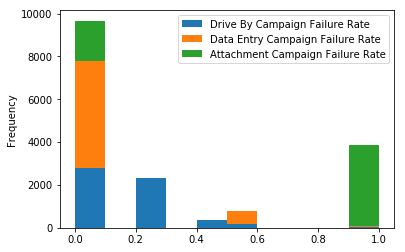

In [133]:
# stacked histogram with multiple variables
user_failed[['Drive By Campaign Failure Rate', 'Data Entry Campaign Failure Rate', 'Attachment Campaign Failure Rate']].plot(kind='hist', stacked=True)

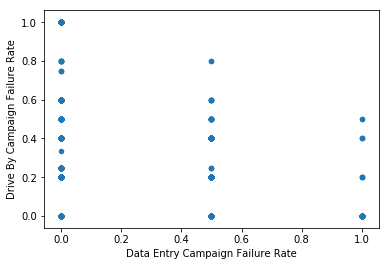

In [134]:
# compare with scatter plot
user_failed.plot(kind='scatter', x='Data Entry Campaign Failure Rate', y='Drive By Campaign Failure Rate')

In [135]:
# The function will count all observations, regardless if there are missing or null values.
length = len(user_failed["Department"])
print(length)

# Count
# The count function will return the number of non-NA/non-null observations in a Series.

count = user_failed["Department"].count()
print(count)

# Percentage of missing Values
number_of_missing_values = length - count
pct_of_missing_values = float(number_of_missing_values / length)
pct_of_missing_values = "{0:.1f}%".format(pct_of_missing_values*100)
print(pct_of_missing_values)

# Minimum/Maximum Value
# The minimum and maximum value of a dataset can easily be obtained with the min and maxfunction on a Series.
print("Minimum value: ", user_failed["Overall Failure Rate"].min())
print("Maximum value: ", user_failed["Overall Failure Rate"].max())

# It can be obtained with the mean function on a Series.
mean = user_failed["Overall Failure Rate"].mean()
standarddev = user_failed["Overall Failure Rate"].std()
print ("mean value:", mean)
print ("standard deviation:", standarddev)

5661
5619
0.7%
Minimum value:  0.125
Maximum value:  1.0
mean value: 0.1915811694047002
standard deviation: 0.11655407452532776


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



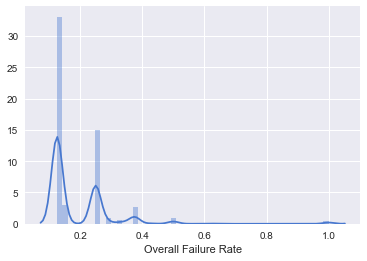

In [136]:
# To create this visualization, 
# we are using the seaborn`` library with thedisplotfunction. 
# This function expects aSeries` with no missing values.

import seaborn as sns
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))
sns.distplot(user_failed["Overall Failure Rate"].dropna());


In [137]:
user_failed[["Department", "Overall Failure Rate", "lvl1"]].corr()

Overall Failure Rate
Overall Failure Rate                   1.0

In [138]:
user_failed[["Department", "Overall Failure Rate"]].describe()

Overall Failure Rate
count           5661.000000
mean               0.191581
std                0.116554
min                0.125000
25%                0.125000
50%                0.125000
75%                0.250000
max                1.000000

In [139]:
user_failed.groupby('Department')["Overall Failure Rate"].agg(['min', 'max'])

min    max
Department                        
0                     0.125  1.000
AB Energy OP FO       0.125  0.250
Acctg Bus Support     0.125  0.250
Acctg Serv MX         0.125  1.000
Aviation Patrol       0.125  0.375
BL Area-ANRP          0.125  0.375
BL Ops-GLGT People    0.125  0.250
BU Communications     0.125  0.125
BUIT CA GAS PIPE SYS  0.125  0.250
BUIT ENERGY CA        0.125  0.125
BUIT LIQUIDS PIPE     0.125  0.125
BUIT MX IT SERVICES   0.125  0.250
BUIT PROJ DEL CA      0.125  1.000
BUIT PROJ DEL US      0.250  1.000
BUIT SCADA EAST       0.125  0.250
BUIT SCADA WEST       0.125  0.375
BUIT USNG EAST        0.125  0.375
BUIT USNG SHARED      0.125  0.125
BUIT USNG WEST        0.125  0.250
BWR Rgn Mgmt -People  0.125  0.250
BWR-North People      0.125  0.250
BWR-South People      0.125  0.375
Badger Area-ANRP      0.125  0.250
Becancour             0.250  0.250
Business Planning     0.125  0.125
CA Commodity Tax      0.125  0.250
CA Gas Commercial     0.250  0.250
CA Gas Proj Const     0.250  0.250
CA Imp Gas Facilitie  0.250  0.250
CA InternalAudit&SOX  0.125  0.333
...                     ...    ...
USPL Property Tax     0.125  0.250
USSM Commercial Op    0.250  0.250
USSM Midstream Comm   0.125  0.125
USSM Optimization     0.125  0.375
USSM Strge RE&G       0.125  0.500
USSM Strge WE&T       0.125  0.375
USTS Auto Control W   0.125  0.250
USTS Auto/Contrl E    0.125  0.375
USTS Bus Opt & Intg   0.125  0.375
USTS Compress East    0.125  0.375
USTS Compress West    0.125  0.375
USTS CoreReliability  0.125  0.250
USTS Eng Serv         0.125  1.000
USTS Integ Progr Ser  0.125  0.250
USTS Integr Eng Serv  0.125  0.500
USTS Integri TM East  0.125  0.250
USTS Integrity&Oper   0.125  0.250
USTS Meas Engin East  0.125  0.375
USTS Measure Serv     0.125  1.000
USTS Mntce Prog&Plan  0.125  0.375
USTS Op Analys&Rprt   0.125  0.375
USTS ROW Maintenance  0.125  0.250
USTS Reliability Mgt  0.125  0.250
USTS Tech Facilitat   0.125  0.250
Weld&Material Eng CA  0.125  0.250
Weld&Material Eng US  0.125  0.250
Welding Mat NDE&C-CA  0.125  0.250
Welding Mat NDE&C-US  0.125  0.125
Woolfolk Area         0.125  0.250
Work Mgmt US          0.125  0.125

[626 rows x 2 columns]

In [154]:
user_failed.groupby('lvl1')["Overall Failure Rate"].agg(['min', 'max'])
user_failed.groupby('lvl1')["Overall Failure Rate"].mean()
user_failed.groupby('lvl1')["Overall Failure Rate"].count()

min    max
lvl1                             
0                    0.125  0.125
Donald Marchand      0.125  1.000
Francois Poirier     0.125  1.000
Kristine Delkus      0.125  1.000
Paul E Miller        0.125  1.000
Stanley Chapman III  0.125  1.000
Tracy Robinson       0.125  1.000
Wendy Hanrahan       0.125  1.000

lvl1
0                      0.125000
Donald Marchand        0.176560
Francois Poirier       0.199833
Kristine Delkus        0.193811
Paul E Miller          0.185440
Stanley Chapman III    0.190292
Tracy Robinson         0.181323
Wendy Hanrahan         0.186003
Name: Overall Failure Rate, dtype: float64

lvl1
0                         5
Donald Marchand         216
Francois Poirier        395
Kristine Delkus         339
Paul E Miller           591
Stanley Chapman III    1557
Tracy Robinson          963
Wendy Hanrahan          713
Name: Overall Failure Rate, dtype: int64

In [155]:
user_failed.groupby(['lvl1', 'Department'])["Overall Failure Rate"].agg(['min', 'max'])
user_failed.groupby(['lvl1', 'Department'])["Overall Failure Rate"].mean()
user_failed.groupby(['lvl1', 'Department'])["Overall Failure Rate"].count()

min    max
lvl1            Department                        
0               Canadian Pipelines    0.125  0.125
                Exec Admin-ShareServ  0.125  0.125
                Executive Admin - US  0.125  0.125
                Executive Leadership  0.125  0.125
Donald Marchand Acctg Bus Support     0.125  0.250
                Acctg Serv MX         0.125  1.000
                CA Commodity Tax      0.125  0.250
                CA Pipeline Acctg E   0.125  0.125
                CA Pipeline Acctg W   0.125  0.125
                Calgary CDN Taxation  0.125  0.250
                Calgary US Taxation   0.125  0.250
                Contract Risk         0.125  0.125
                Controller            0.125  0.250
                Corp Evaluations      0.125  0.250
                Corp Finance&Pension  0.125  0.125
                Corp Plan & Eval      0.125  0.125
                Corporate Accounting  0.125  0.125
                Corporate Finance     0.125  0.125
                Corporate Treasury    0.125  0.250
                Counterparty Rptng    0.250  0.250
                Ctrparty Risk Mgmt    0.125  0.250
                Energy Acctg West     0.125  0.250
                Energy-Fncl Services  0.125  0.250
                Executive Leadership  0.125  0.125
                Financial Assurance   0.125  0.125
                Financial Reporting   0.125  0.125
                Financial Ser CA Gas  0.125  0.250
                Fncl Acctg&projs      0.125  0.125
                Houston Inc Tax Gas   0.125  1.000
                Insurance Risk        0.125  0.125
...                                     ...    ...
Wendy Hanrahan  SCADA IT SERVICES US  0.125  0.125
                SCCM Construct Serv   0.125  0.143
                SCCM Corp & Consult   0.125  0.250
                SCCM Lifecycle Mgmt   0.125  0.250
                SCCM Mat & Equip      0.125  0.250
                SCCO CGO & PI CA      0.125  0.375
                SCCO Corp Serv        0.125  0.250
                SCCO Energy CA        0.125  0.125
                SCE Global Cont Mgmt  0.125  0.125
                SCE Management        0.125  0.125
                SCE Strat&Func Excel  0.125  0.125
                SCE Vendor Audit      0.250  0.250
                SCP Coastal GasLink   0.125  0.250
                SCP Mod/Contr & Plan  0.125  0.375
                SCP Projects          0.125  0.375
                SCP Reg Pipes Fac     0.125  0.500
                SCP US Capital Proj   0.125  0.125
                SCP US Contract Mgmt  0.125  1.000
                SCP US Gas Strategy   0.125  0.250
                SCP US PLNG &PROC     0.125  0.250
                SCS AP CA             0.125  0.250
                SCS AP US             0.125  0.375
                SCS Logistics &Fleet  0.125  0.250
                SCS Purchasing CA     0.125  1.000
                SCUO MX AP            0.125  1.000
                Supply Chain KXL CAD  0.125  0.250
                Supply Chain Mgmt     0.125  0.125
                US Aerial Patrol      0.125  0.250
                US Rewards & HR Serv  0.125  0.125
                US SC Ops Procuremnt  0.125  0.250

[631 rows x 2 columns]

lvl1             Department          
0                Canadian Pipelines      0.125000
                 Exec Admin-ShareServ    0.125000
                 Executive Admin - US    0.125000
                 Executive Leadership    0.125000
Donald Marchand  Acctg Bus Support       0.187500
                 Acctg Serv MX           0.260417
                 CA Commodity Tax        0.156250
                 CA Pipeline Acctg E     0.125000
                 CA Pipeline Acctg W     0.125000
                 Calgary CDN Taxation    0.171875
                 Calgary US Taxation     0.166667
                 Contract Risk           0.125000
                 Controller              0.187500
                 Corp Evaluations        0.145833
                 Corp Finance&Pension    0.125000
                 Corp Plan & Eval        0.125000
                 Corporate Accounting    0.125000
                 Corporate Finance       0.125000
                 Corporate Treasury      0.187500
            

lvl1             Department          
0                Canadian Pipelines       1
                 Exec Admin-ShareServ     1
                 Executive Admin - US     1
                 Executive Leadership     2
Donald Marchand  Acctg Bus Support        4
                 Acctg Serv MX           12
                 CA Commodity Tax         4
                 CA Pipeline Acctg E      3
                 CA Pipeline Acctg W      4
                 Calgary CDN Taxation     8
                 Calgary US Taxation      3
                 Contract Risk            5
                 Controller               2
                 Corp Evaluations         6
                 Corp Finance&Pension     4
                 Corp Plan & Eval         4
                 Corporate Accounting     5
                 Corporate Finance        1
                 Corporate Treasury       6
                 Counterparty Rptng       1
                 Ctrparty Risk Mgmt       5
                 Energy Acctg West    

In [153]:
user_failed.groupby(['lv2', 'Department'])["Overall Failure Rate"].agg(['min', 'max'])
user_failed.groupby(['lv2', 'Department'])["Overall Failure Rate"].mean()

min    max
lv2                 Department                        
0                   COE Management        0.125  0.125
                    Canadian Pipelines    0.125  0.250
                    Controller            0.125  0.125
                    Corp Aviation-Cgy     0.125  0.125
                    ELIR Mgmt Services    0.125  0.125
                    Energy Comm Op West   0.125  0.125
                    Enrg Joint Ventures   0.125  0.125
                    Exec Admin-ShareServ  0.125  0.125
                    Executive Admin - US  0.125  0.250
                    Executive Leadership  0.125  0.125
                    Facilities Ser Clgry  0.250  0.250
                    Fed Gov Relations US  0.375  0.375
                    Gas Proj MX Expat CA  0.250  0.250
                    HR People Management  0.125  0.125
                    IS MANAGEMENT         0.125  0.125
                    Risk Management       0.125  0.125
                    Taxation              0.125  0.125
Alexandra Federucci HR BU Consulting US   0.125  0.500
                    HR Compensation       0.125  0.250
                    HR Compliance & Prog  0.125  0.125
                    HR Consult CdnGas     0.125  0.250
                    HR Consulting Corp    0.125  0.250
                    HR Employe Center CA  0.125  0.250
                    HR Global Mobility    0.125  0.125
                    HR MX                 0.125  0.125
                    HR Master Data Mgmt   0.125  0.250
                    HR Payroll and Ops    0.125  0.250
                    HR Pension&Benefits   0.125  0.250
                    HR People Management  0.250  0.250
                    HR Shared Serv US     0.125  0.375
...                                         ...    ...
VACANT              Pennant Trunkline     0.125  0.125
                    Rec&Delivery FCST     0.125  0.500
                    Strategy Collab&Coor  0.125  0.125
                    US Midstrm Mgmt       0.125  0.500
                    US Midstrm Ops        0.125  0.375
                    USLFO CM Ppl          0.125  0.375
                    USLFO Enviro Srv Ppl  0.250  0.250
                    USLFO GL Ppl          0.125  0.250
                    USLFO GT Ppl          0.125  1.000
                    USLFO RR Ppl          0.125  0.250
                    USLFO Reg MGT Ppl     0.125  0.125
                    USNG BU Optimization  0.125  0.250
                    USNG Bus Dev Central  0.125  0.375
                    USNG Comm Prj&Interc  0.125  0.375
                    USNG Comm Services    0.125  0.250
                    USNG Exec Admin       0.125  0.375
                    USNG Gas Contrl East  0.125  0.500
                    USNG Gas Control W    0.125  0.375
                    USNG Grad Rotat Prog  0.125  0.250
                    USNG Marketing East   0.125  0.375
                    USNG Marketing West   0.125  0.333
                    USNG Nominat&Schedul  0.125  1.000
                    USNG Pricing&Bus Ana  0.125  0.125
                    USNG Rates&Tariffs    0.125  0.250
                    USNG ST Marketing     0.125  0.250
                    USNG Strategy         0.125  0.250
                    USNG Trans Acc&Contr  0.125  0.375
                    USSM Commercial Op    0.250  0.250
                    USSM Midstream Comm   0.125  0.125
                    USSM Optimization     0.125  0.375

[641 rows x 2 columns]

lv2                  Department          
0                    COE Management          0.125000
                     Canadian Pipelines      0.187500
                     Controller              0.125000
                     Corp Aviation-Cgy       0.125000
                     ELIR Mgmt Services      0.125000
                     Energy Comm Op West     0.125000
                     Enrg Joint Ventures     0.125000
                     Exec Admin-ShareServ    0.125000
                     Executive Admin - US    0.187500
                     Executive Leadership    0.125000
                     Facilities Ser Clgry    0.250000
                     Fed Gov Relations US    0.375000
                     Gas Proj MX Expat CA    0.250000
                     HR People Management    0.125000
                     IS MANAGEMENT           0.125000
                     Risk Management         0.125000
                     Taxation                0.125000
Alexandra Federucci  HR BU Consulting US

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



lvl1             Department          
0                Canadian Pipelines      AxesSubplot(0.125,0.125;0.775x0.755)
                 Exec Admin-ShareServ    AxesSubplot(0.125,0.125;0.775x0.755)
                 Executive Admin - US    AxesSubplot(0.125,0.125;0.775x0.755)
                 Executive Leadership    AxesSubplot(0.125,0.125;0.775x0.755)
Donald Marchand  Acctg Bus Support       AxesSubplot(0.125,0.125;0.775x0.755)
                 Acctg Serv MX           AxesSubplot(0.125,0.125;0.775x0.755)
                 CA Commodity Tax        AxesSubplot(0.125,0.125;0.775x0.755)
                 CA Pipeline Acctg E     AxesSubplot(0.125,0.125;0.775x0.755)
                 CA Pipeline Acctg W     AxesSubplot(0.125,0.125;0.775x0.755)
                 Calgary CDN Taxation    AxesSubplot(0.125,0.125;0.775x0.755)
                 Calgary US Taxation     AxesSubplot(0.125,0.125;0.775x0.755)
                 Contract Risk           AxesSubplot(0.125,0.125;0.775x0.755)
                 Controlle

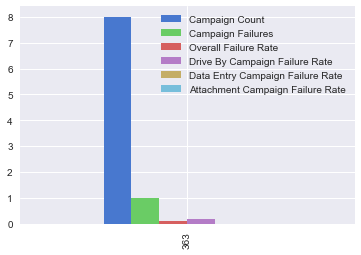

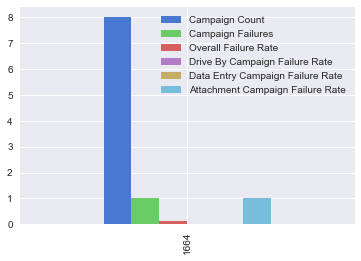

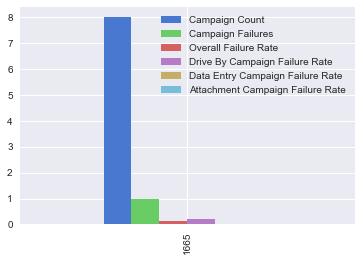

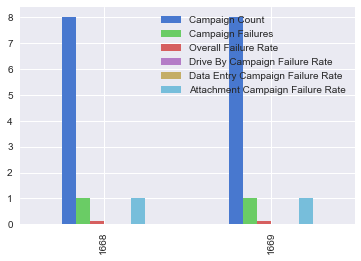

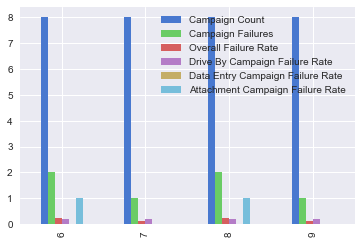

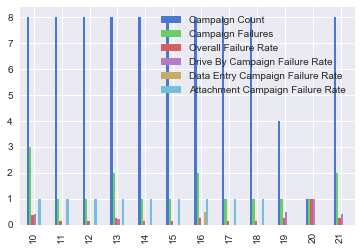

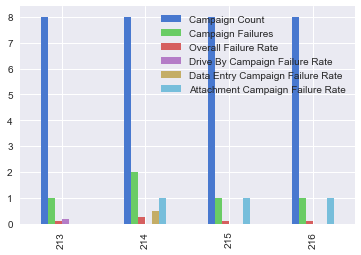

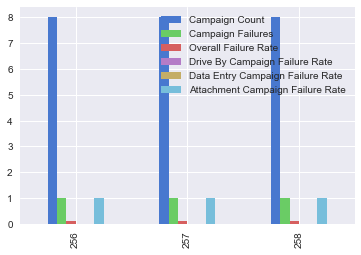

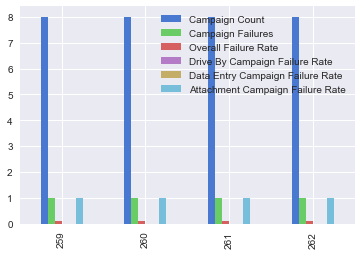

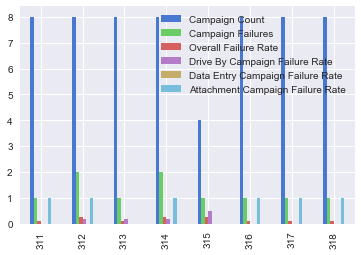

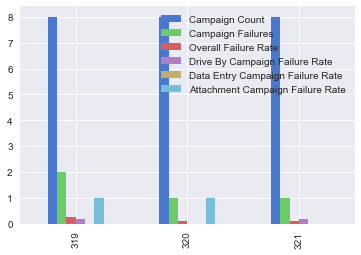

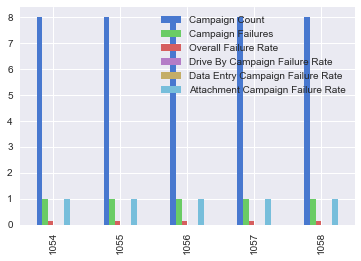

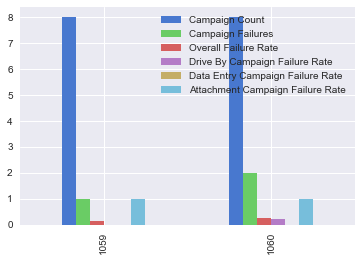

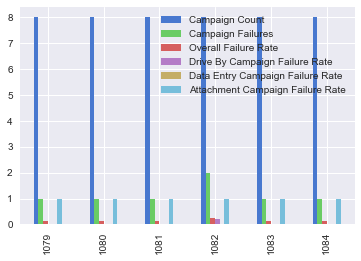

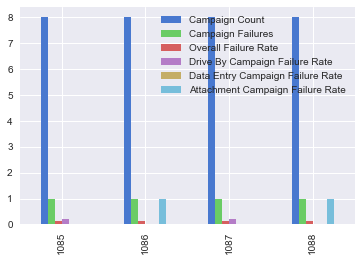

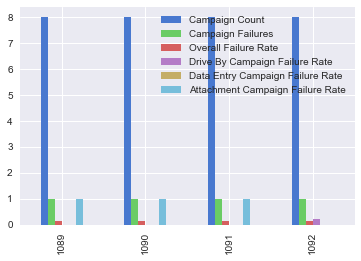

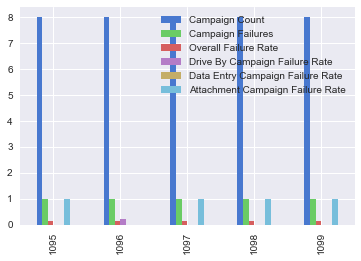

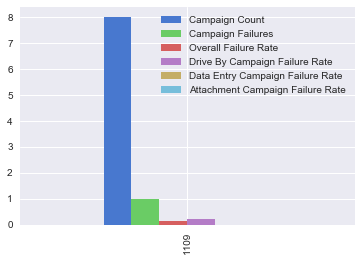

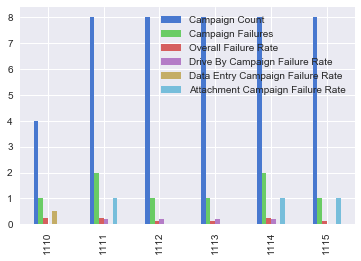

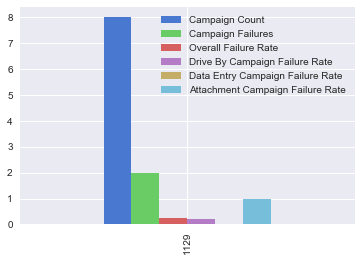

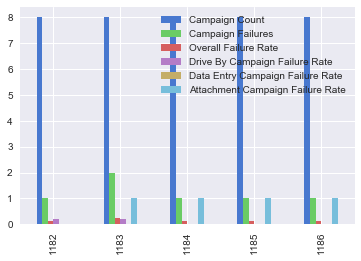

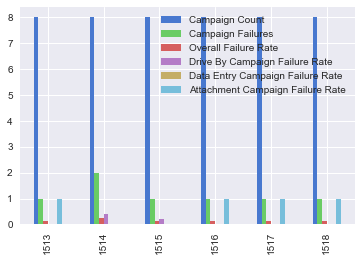

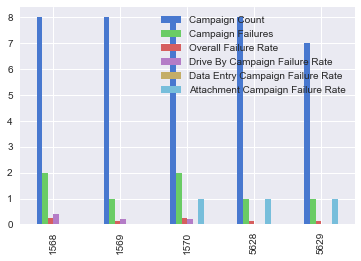

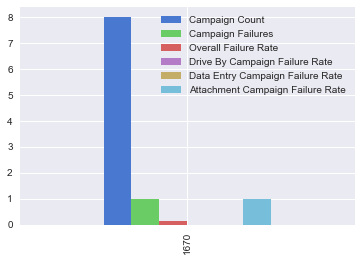

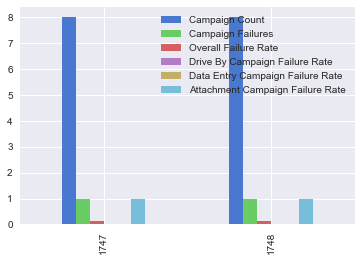

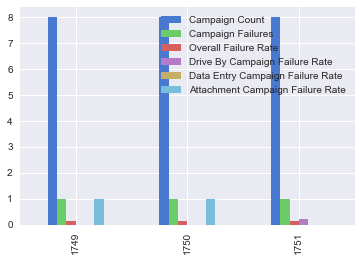

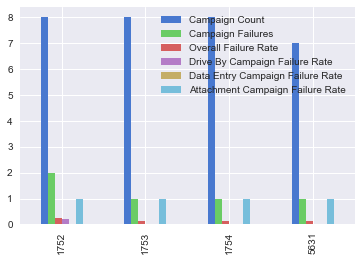

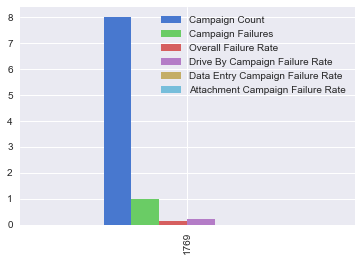

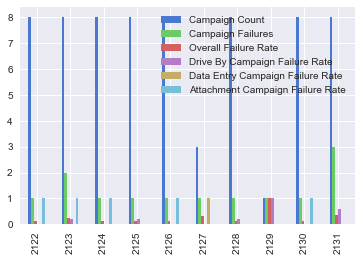

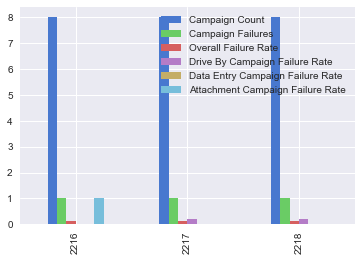

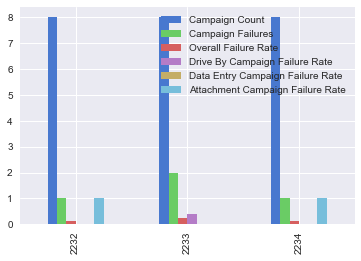

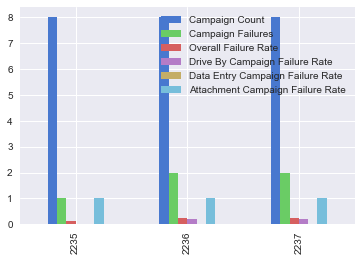

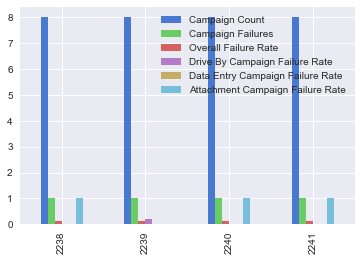

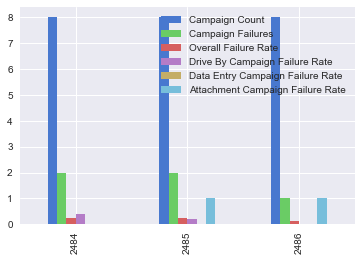

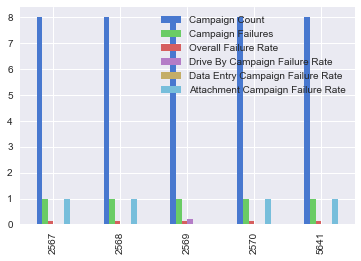

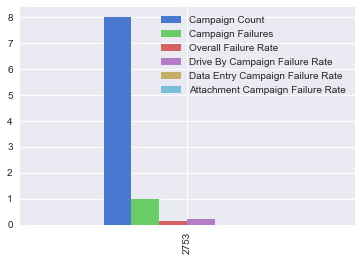

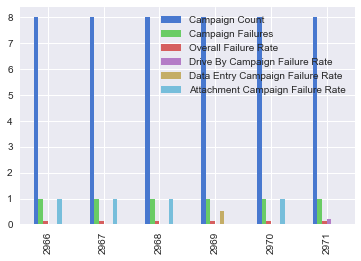

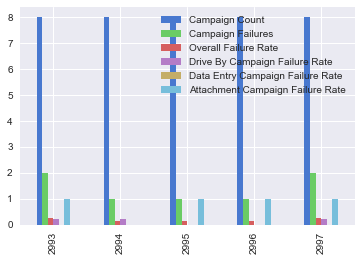

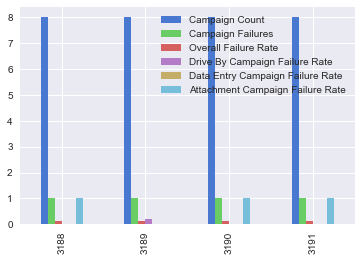

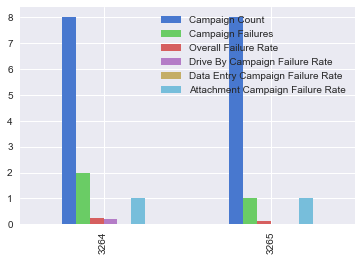

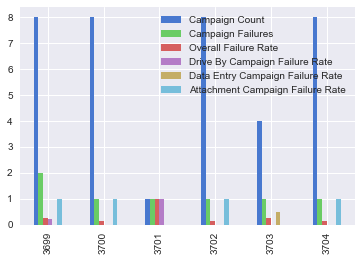

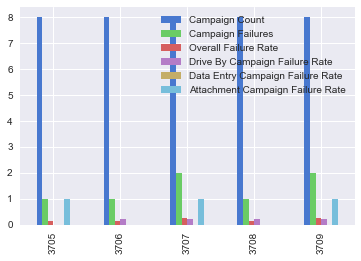

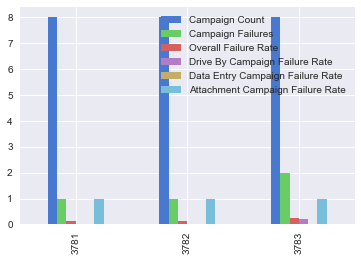

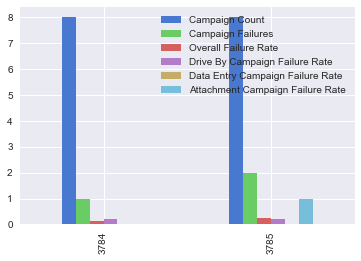

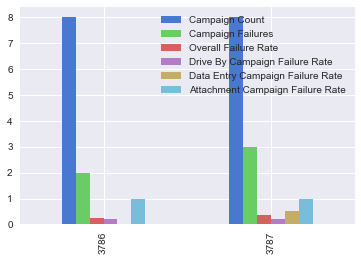

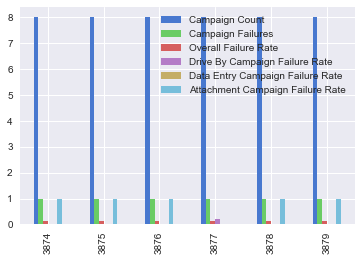

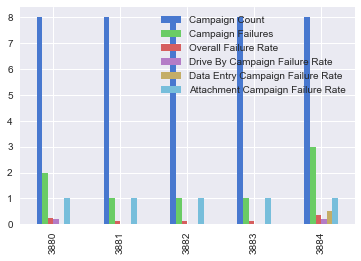

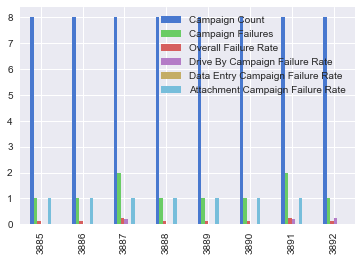

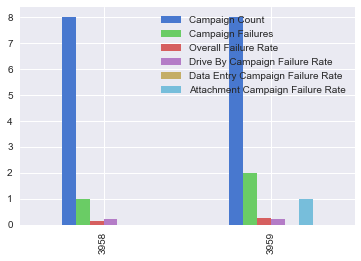

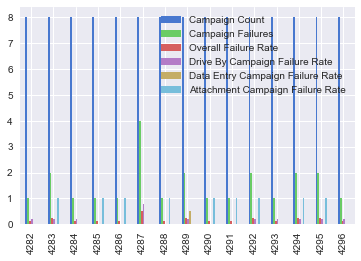

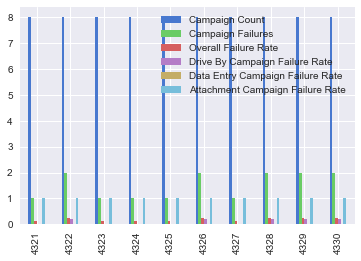

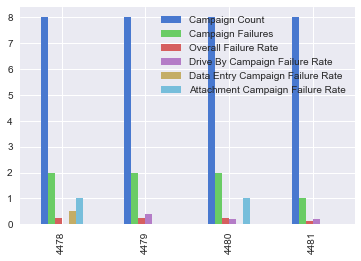

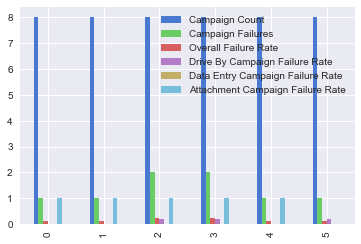

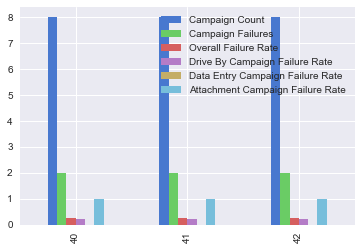

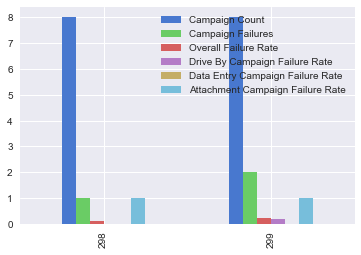

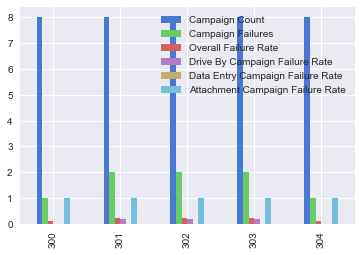

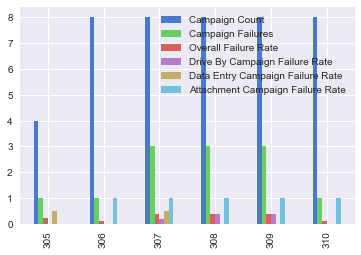

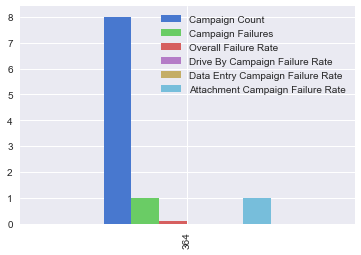

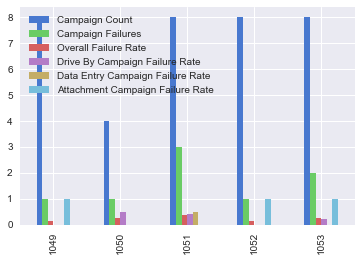

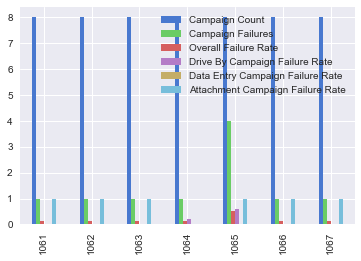

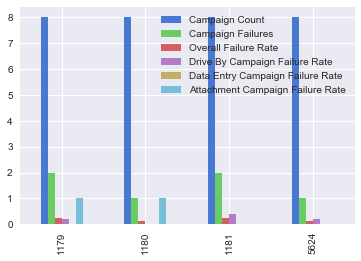

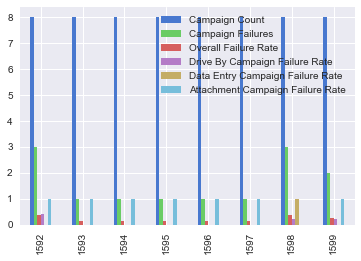

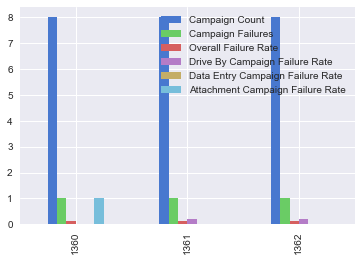

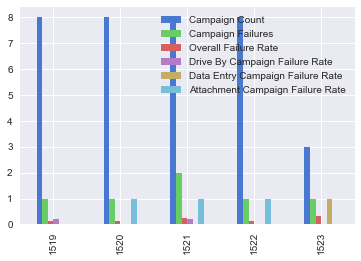

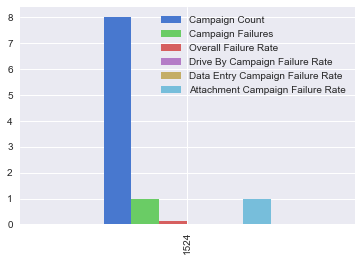

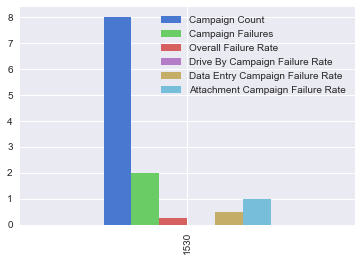

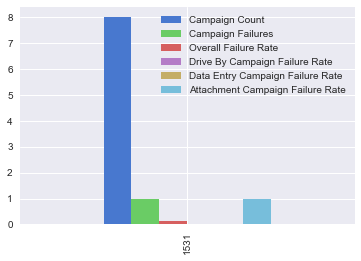

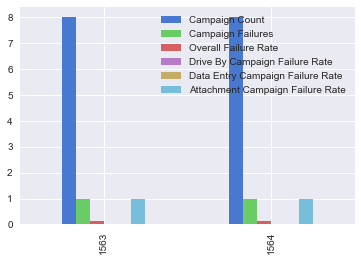

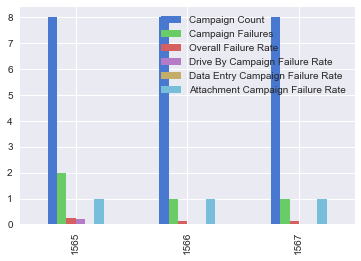

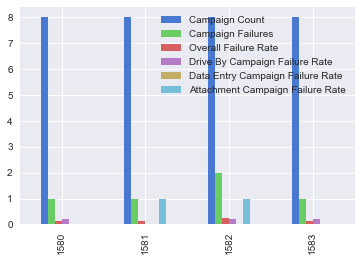

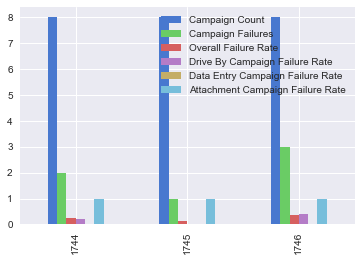

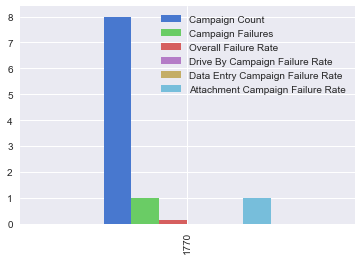

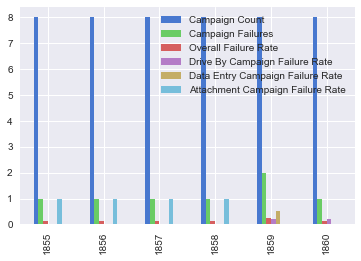

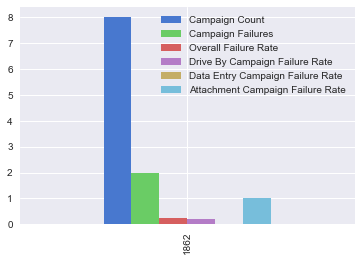

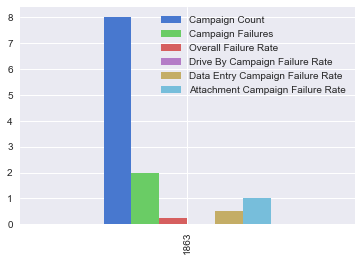

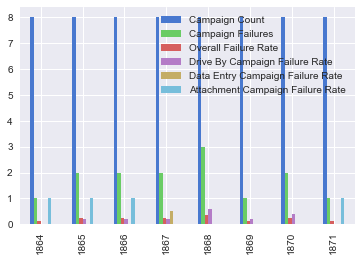

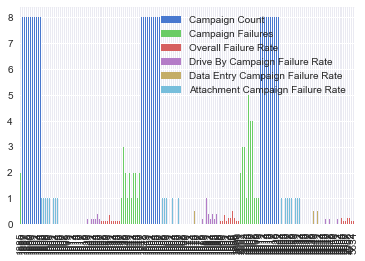

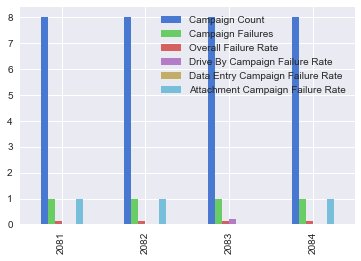

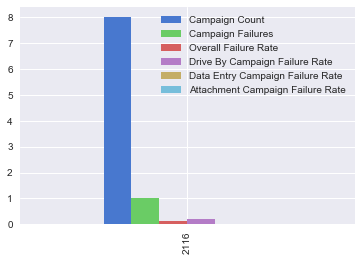

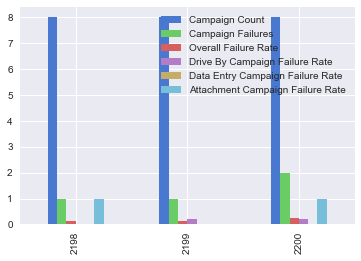

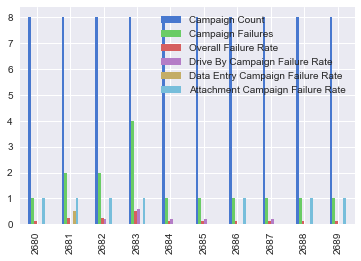

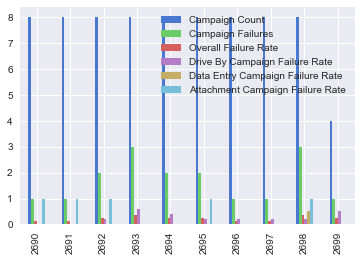

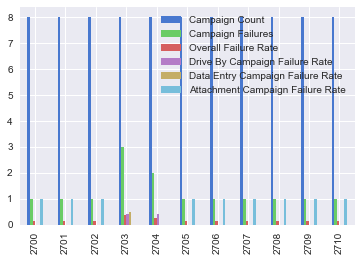

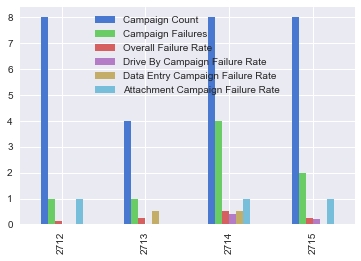

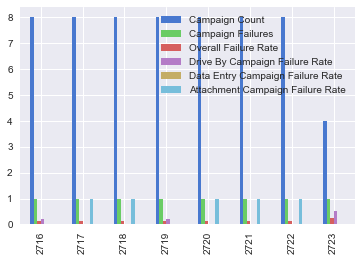

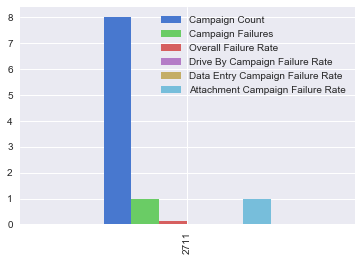

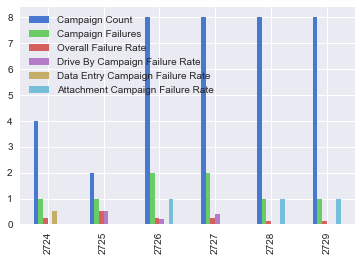

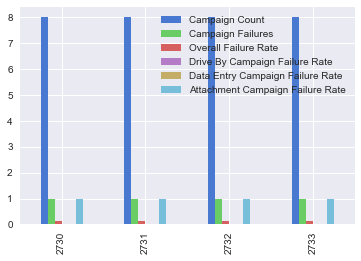

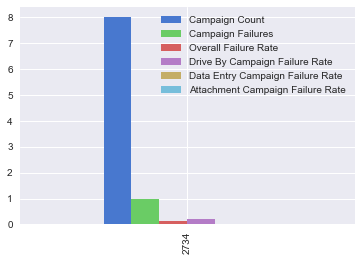

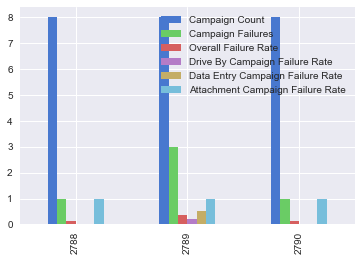

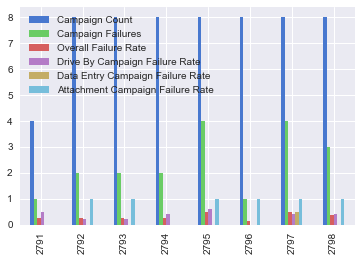

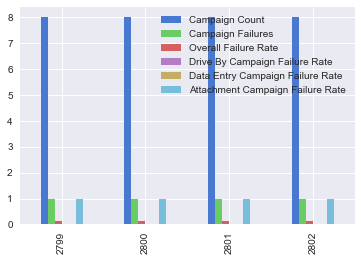

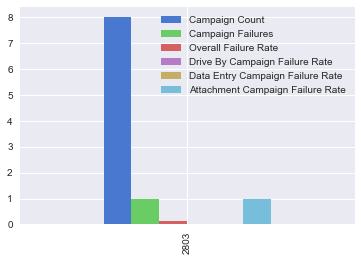

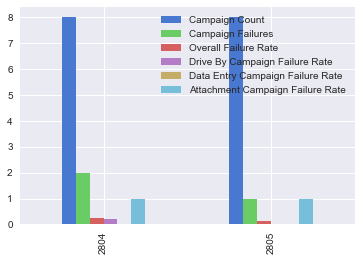

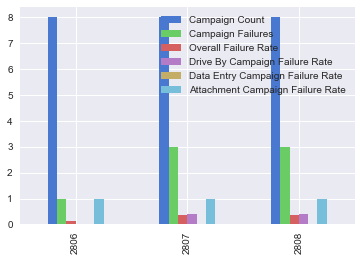

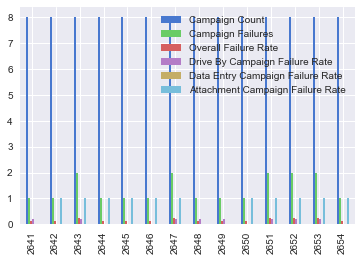

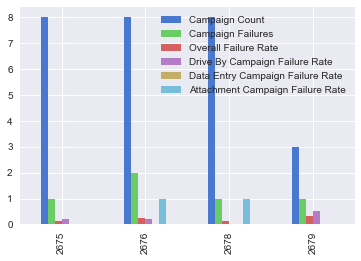

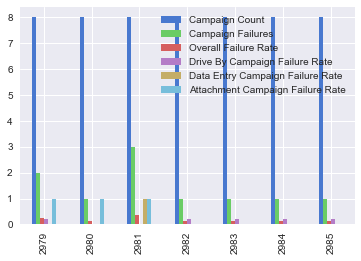

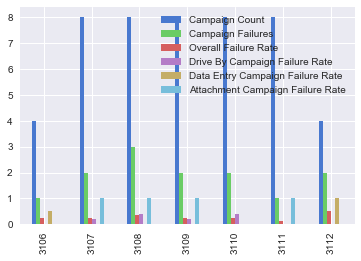

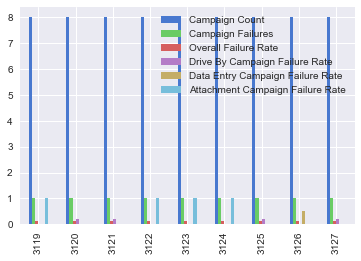

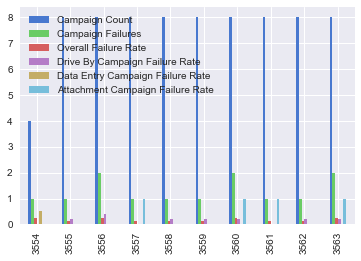

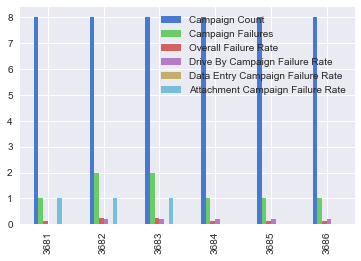

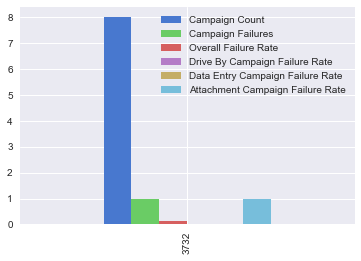

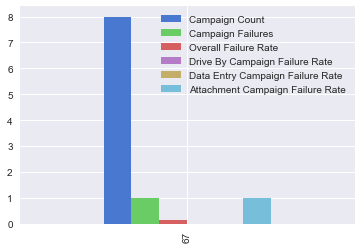

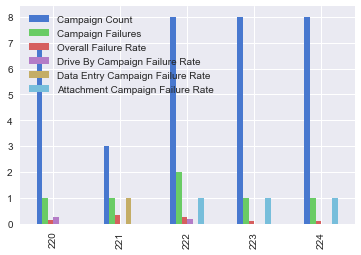

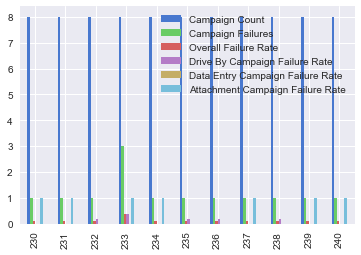

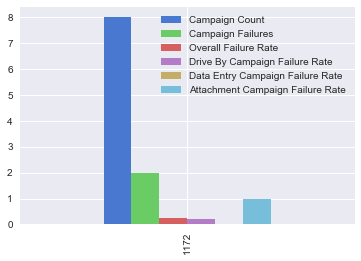

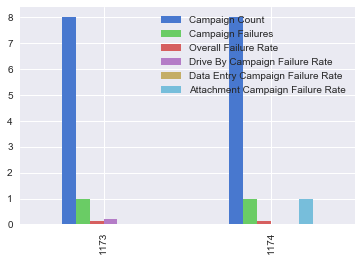

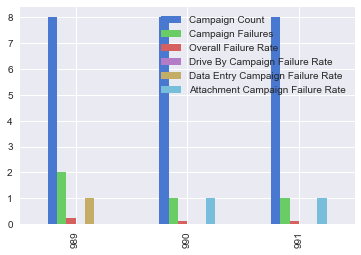

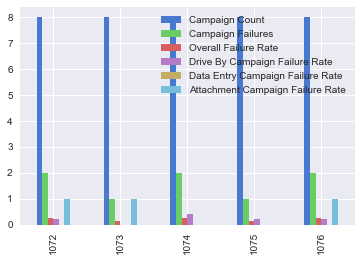

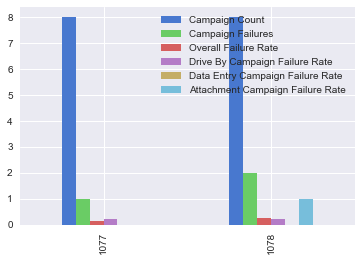

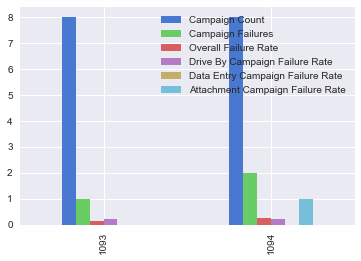

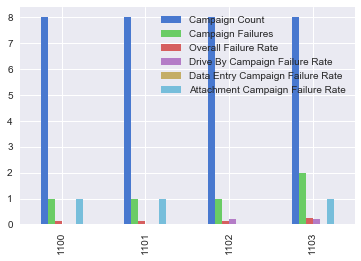

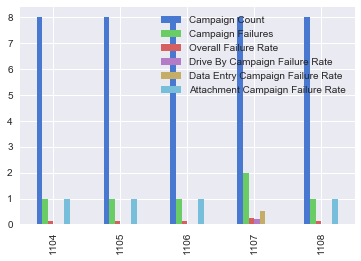

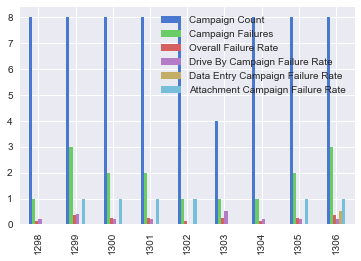

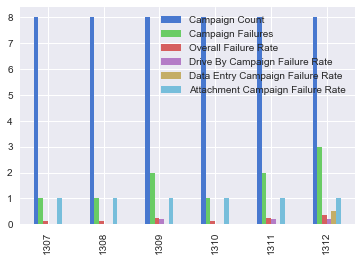

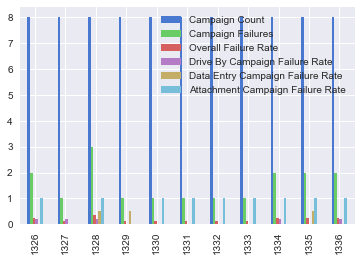

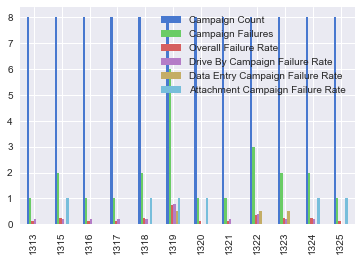

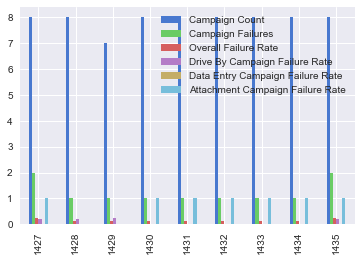

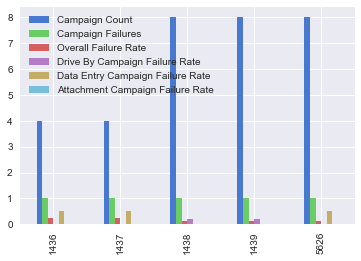

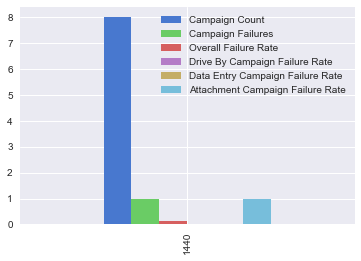

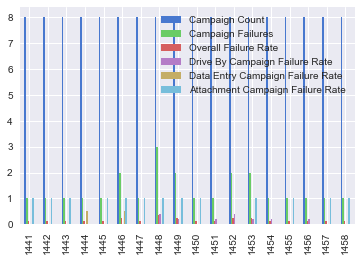

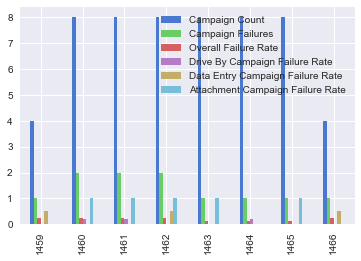

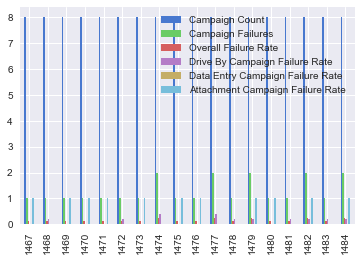

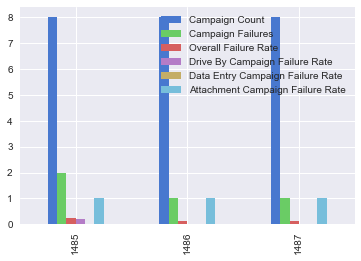

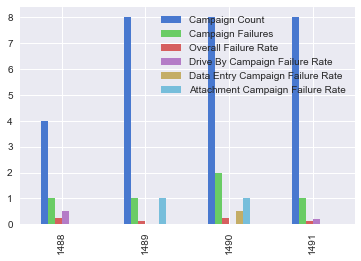

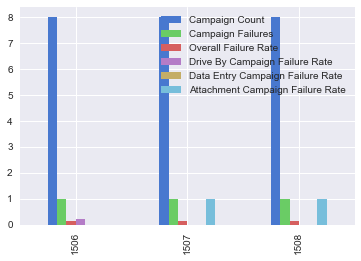

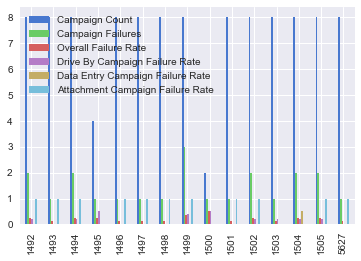

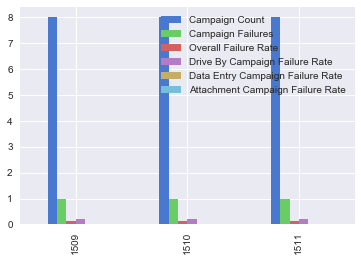

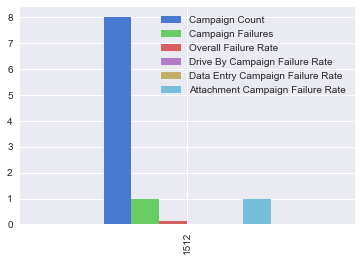

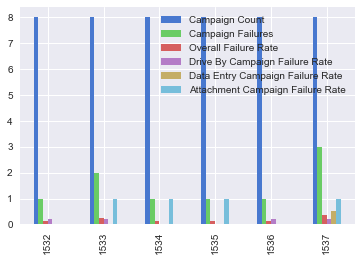

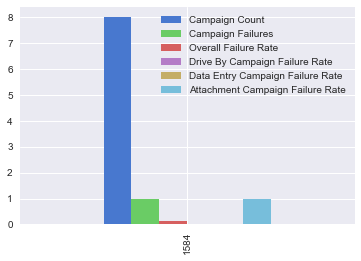

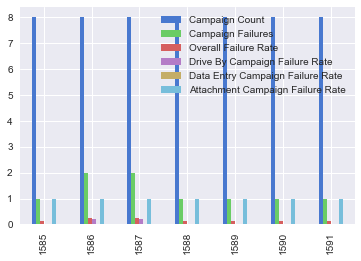

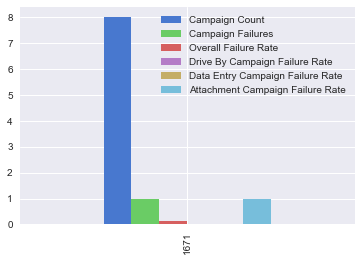

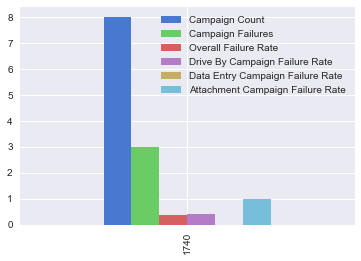

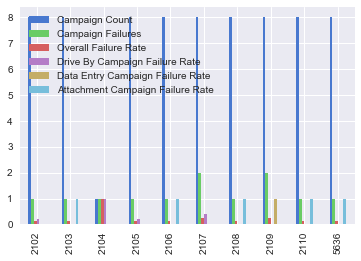

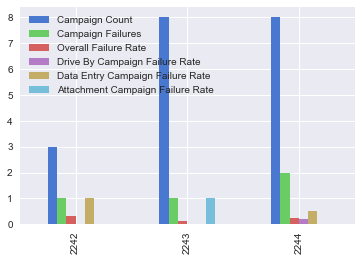

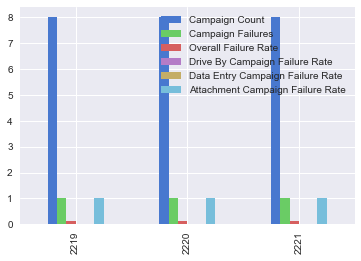

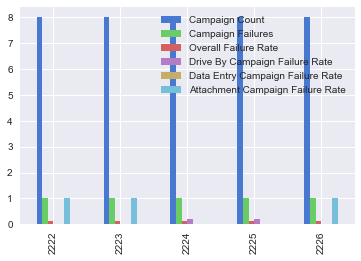

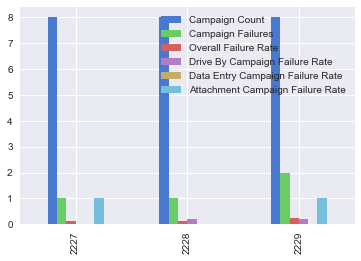

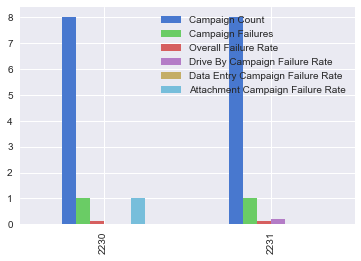

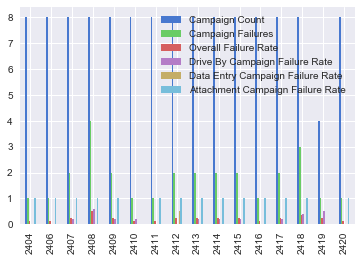

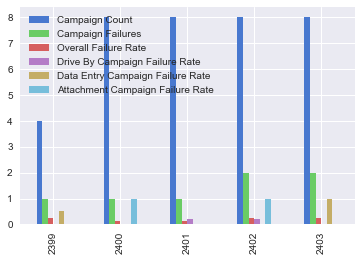

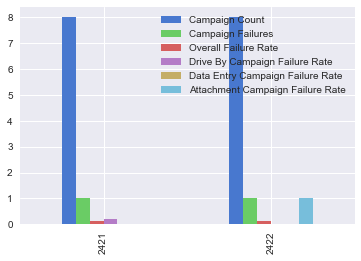

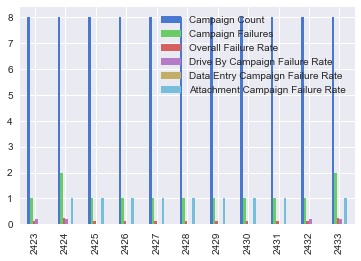

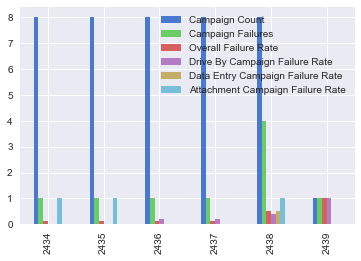

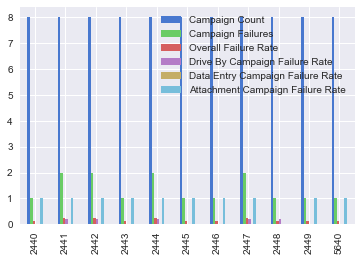

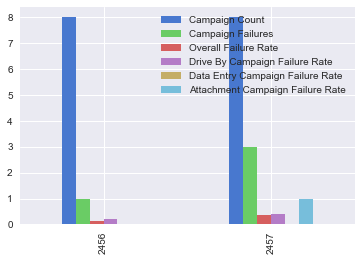

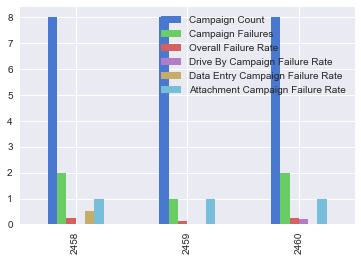

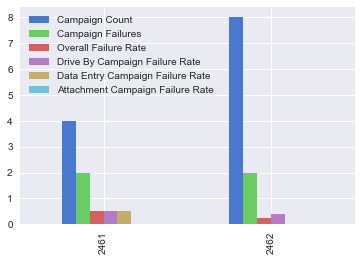

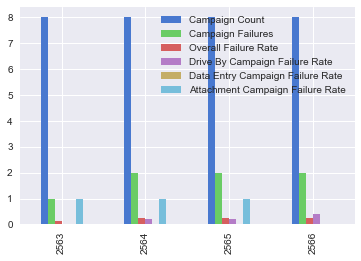

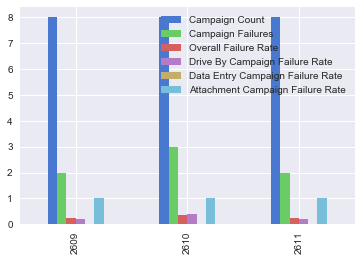

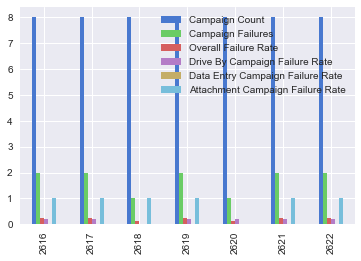

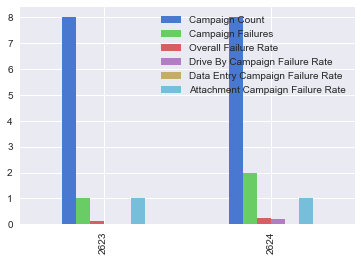

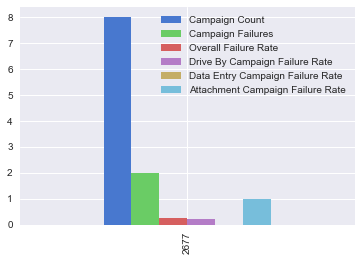

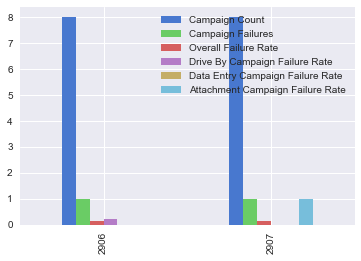

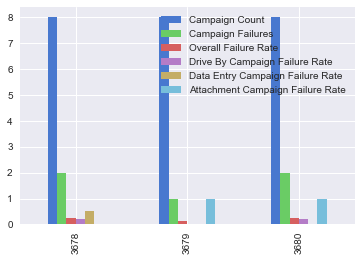

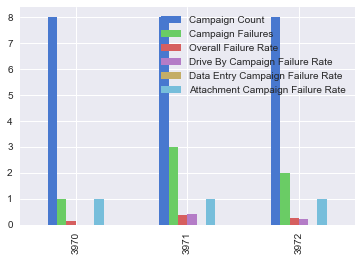

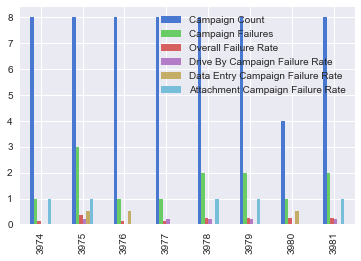

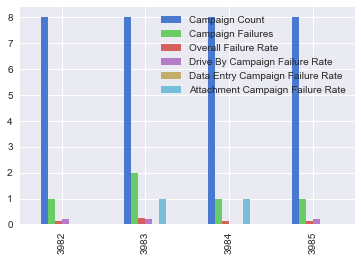

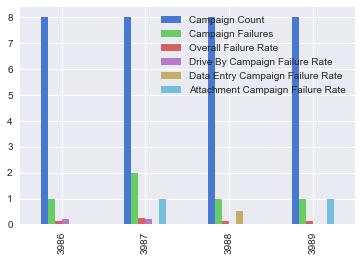

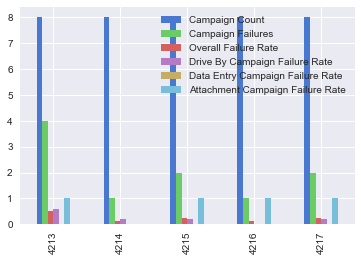

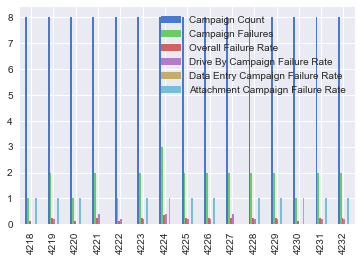

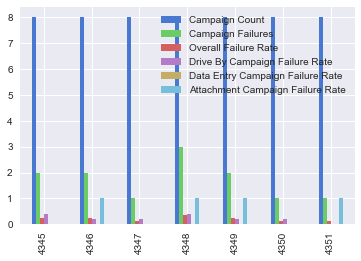

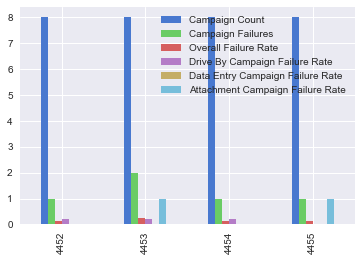

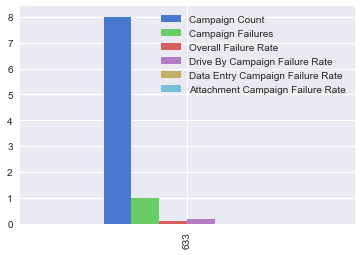

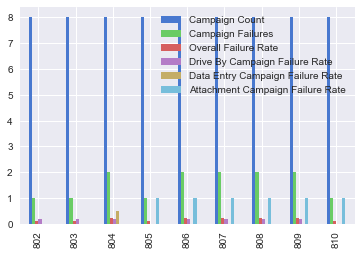

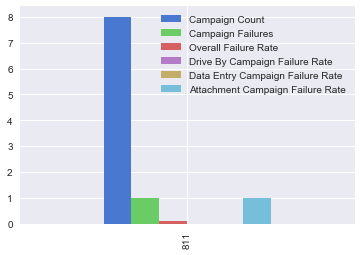

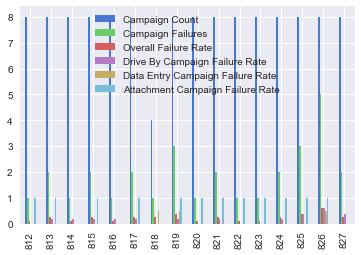

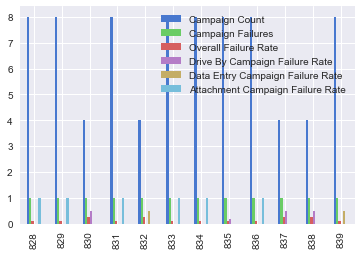

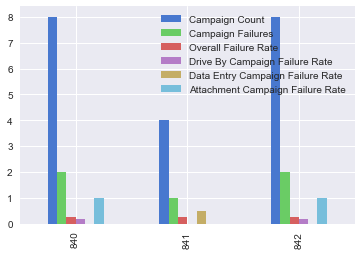

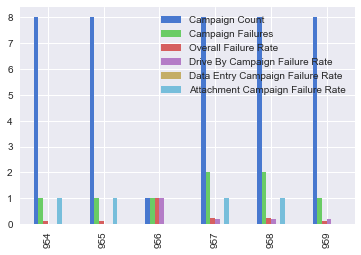

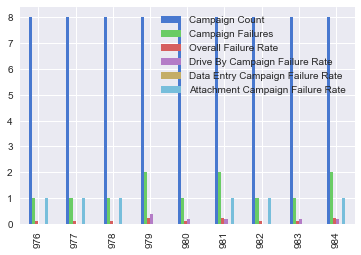

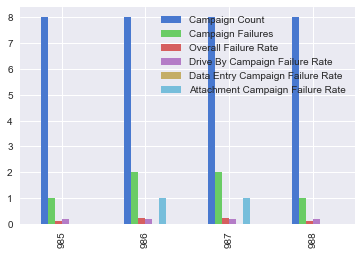

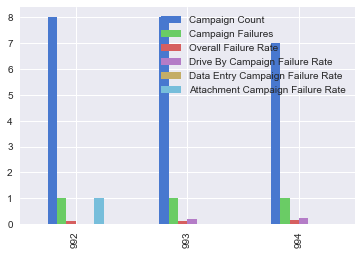

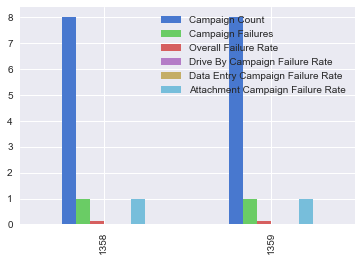

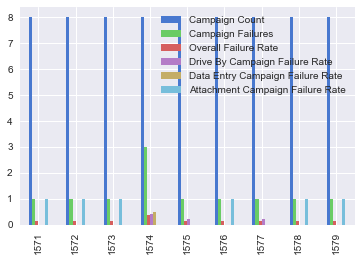

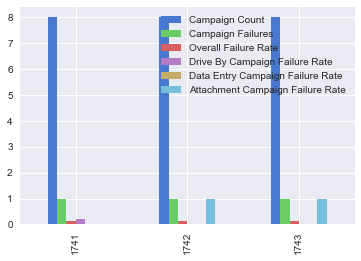

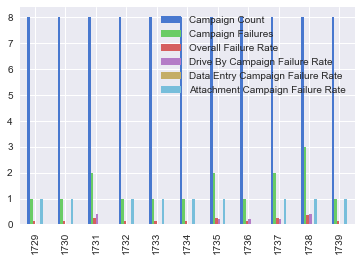

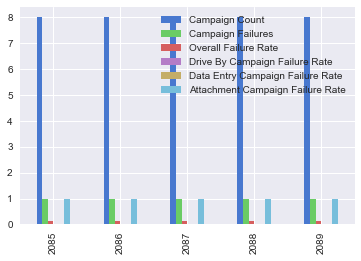

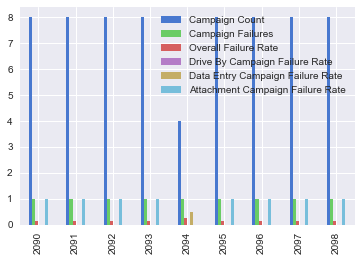

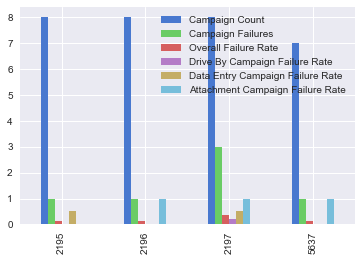

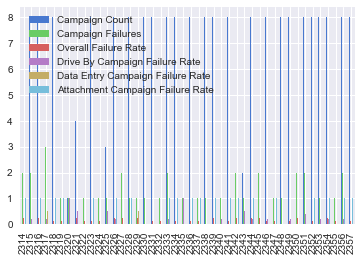

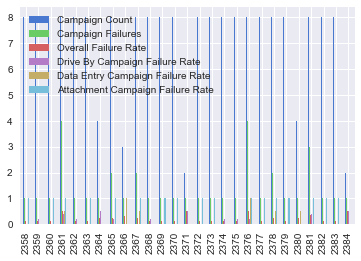

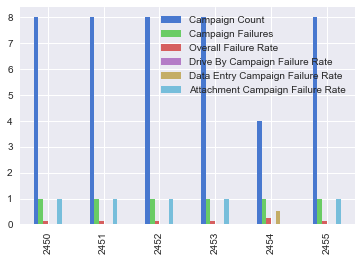

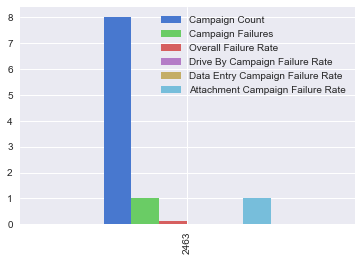

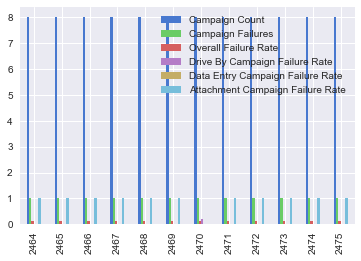

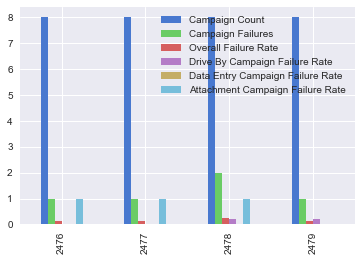

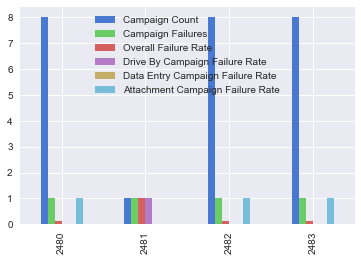

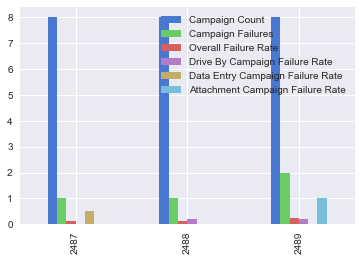

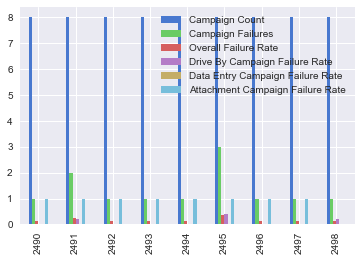

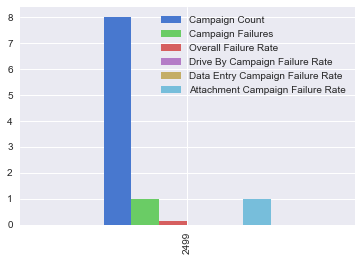

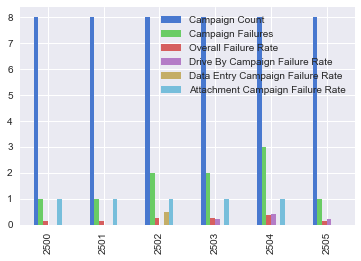

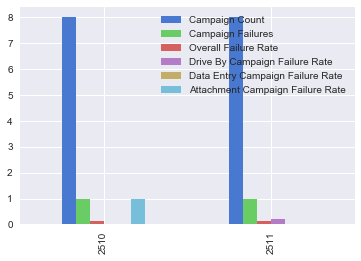

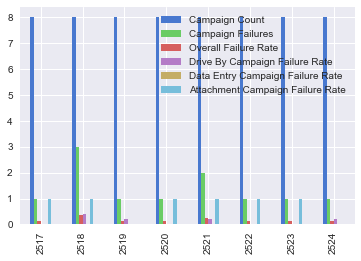

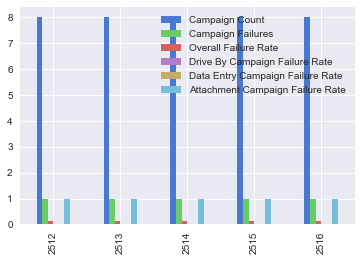

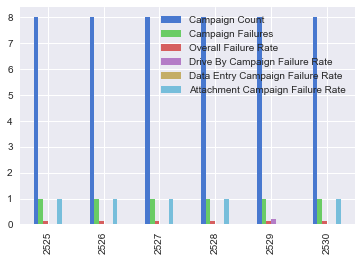

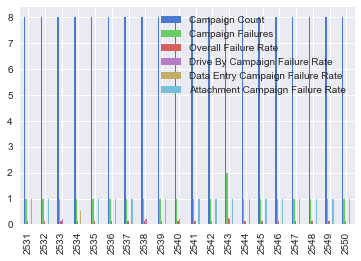

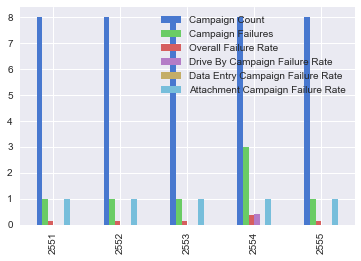

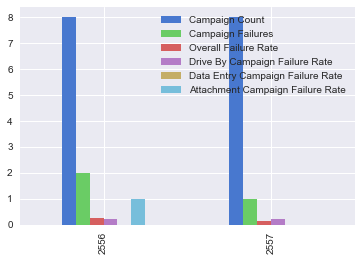

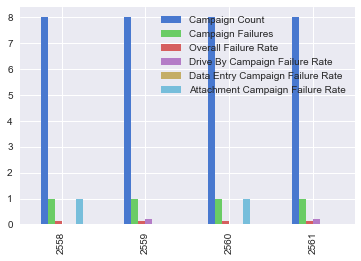

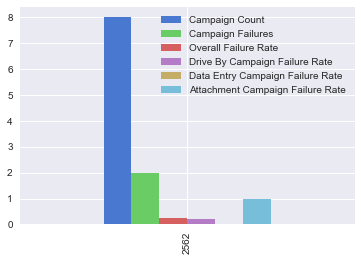

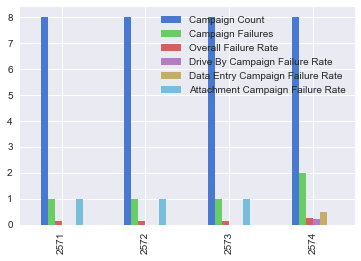

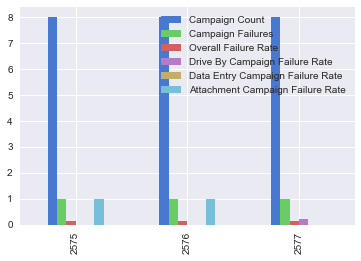

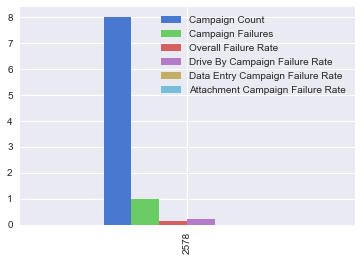

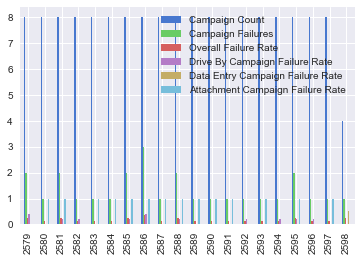

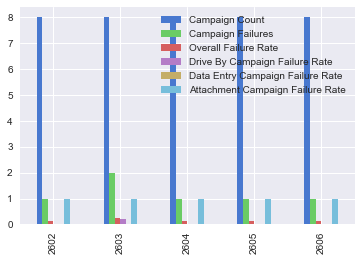

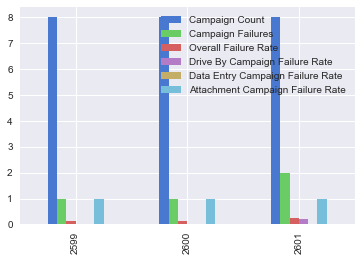

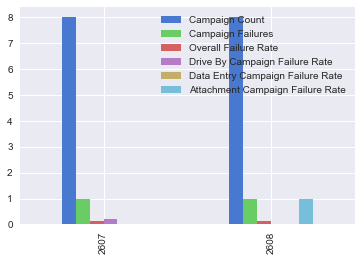

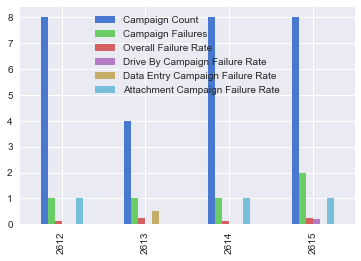

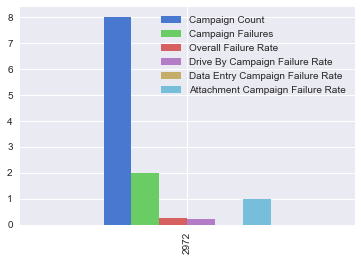

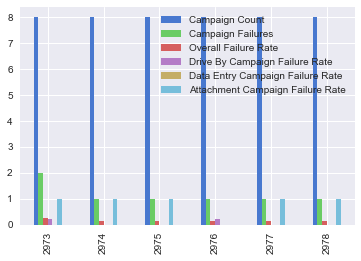

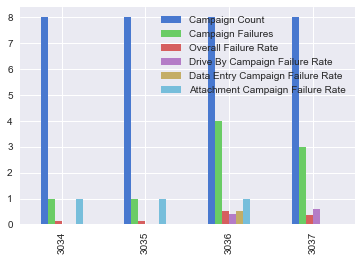

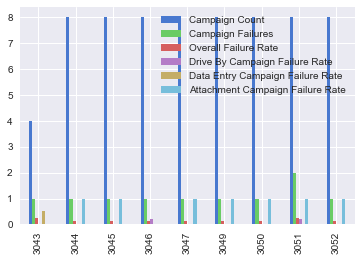

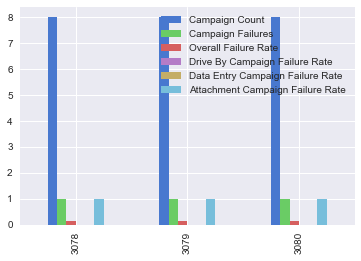

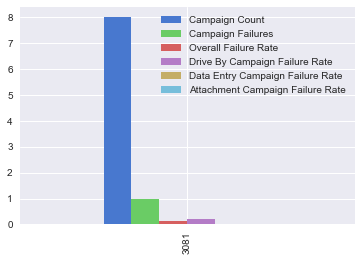

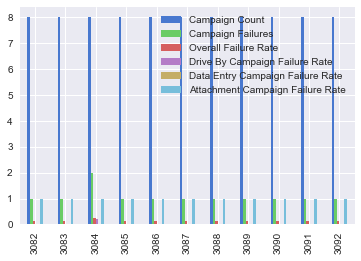

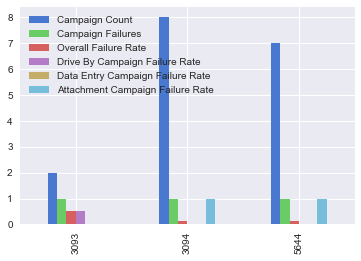

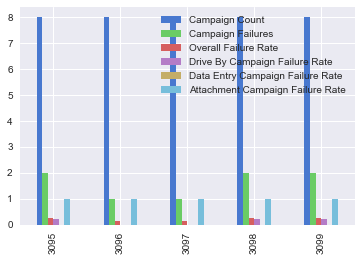

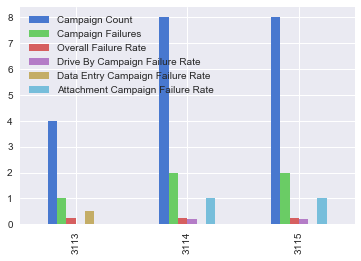

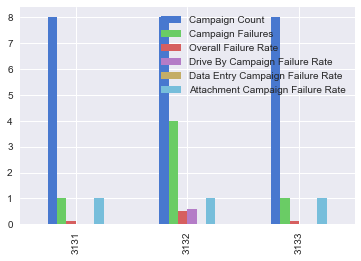

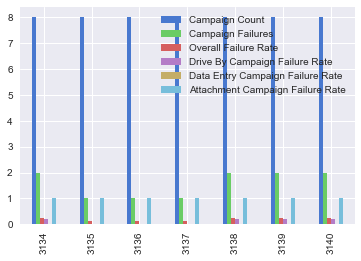

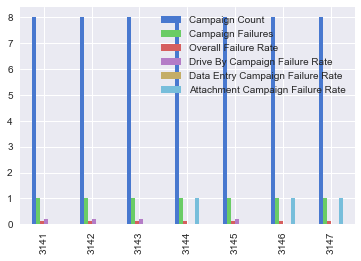

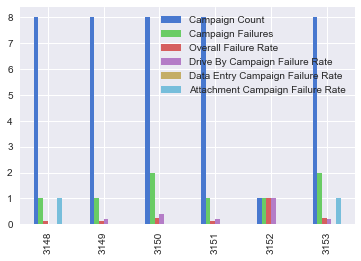

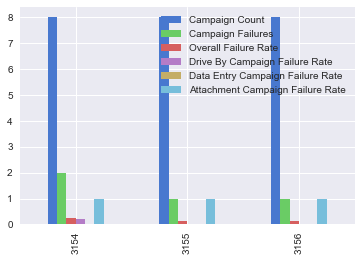

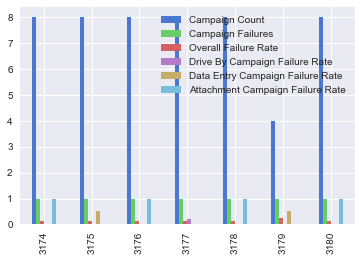

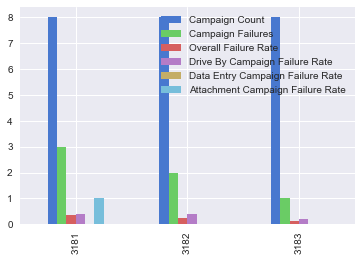

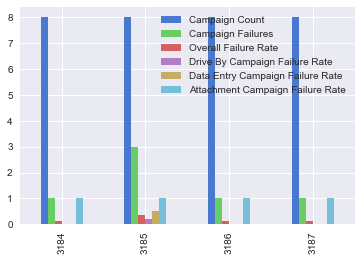

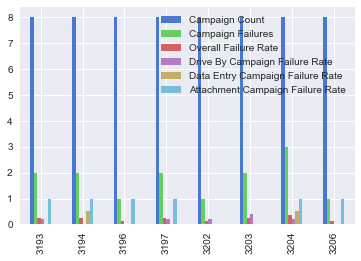

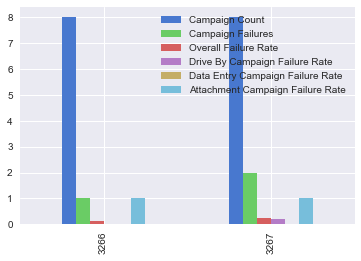

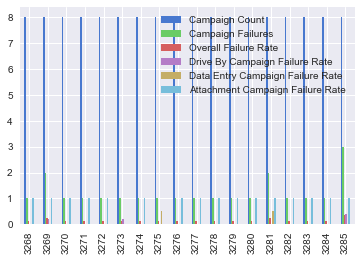

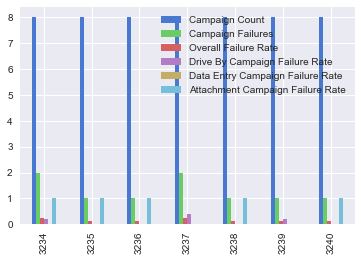

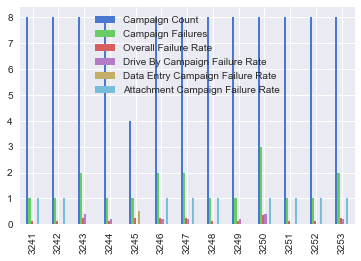

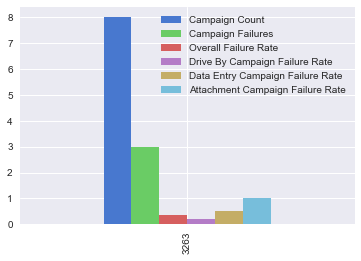

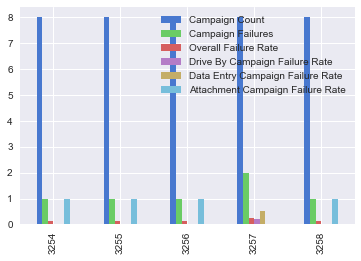

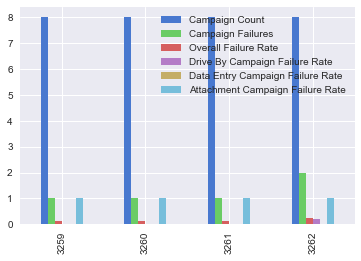

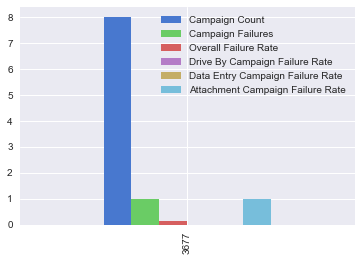

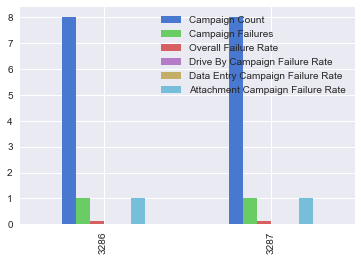

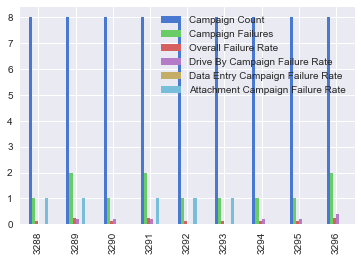

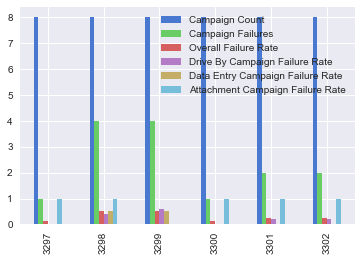

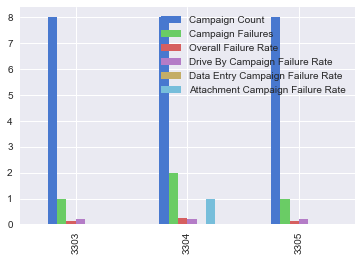

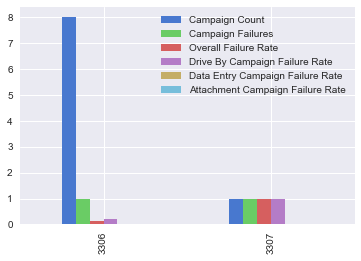

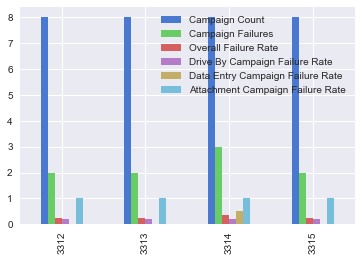

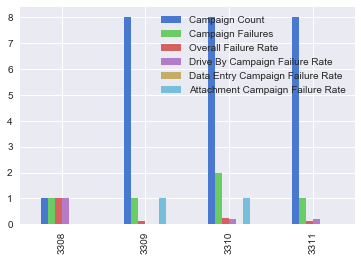

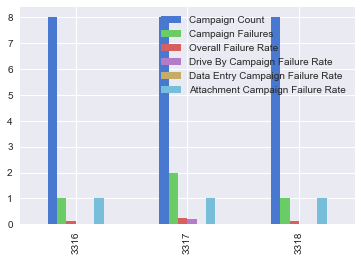

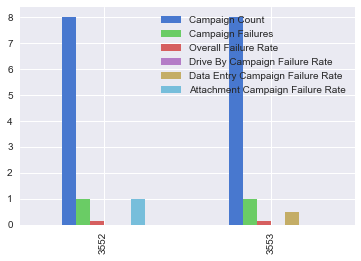

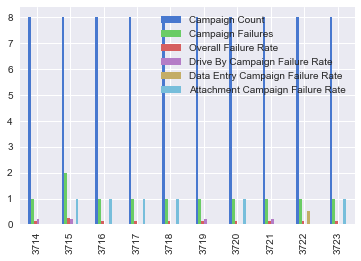

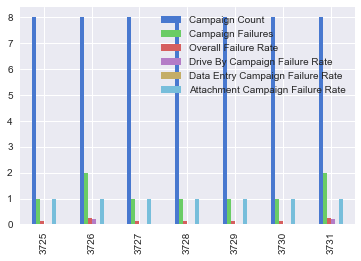

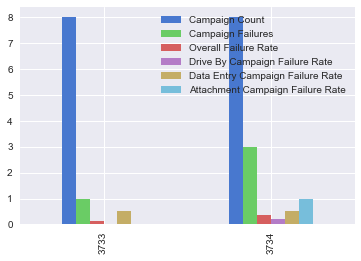

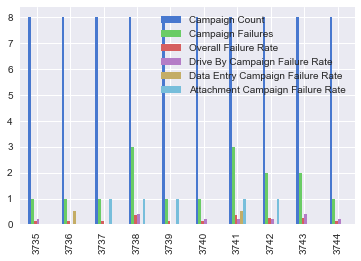

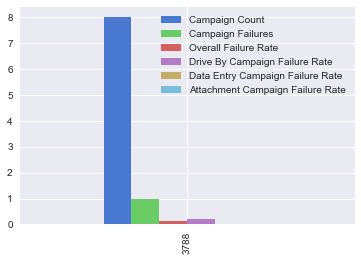

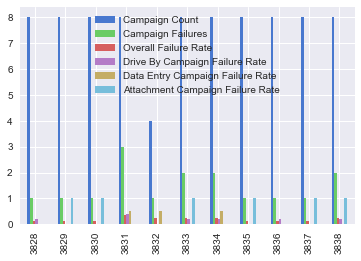

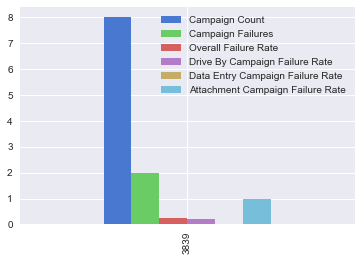

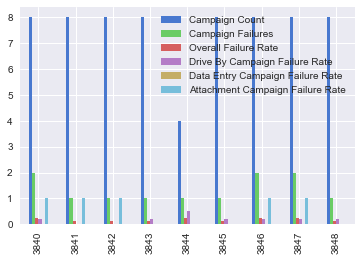

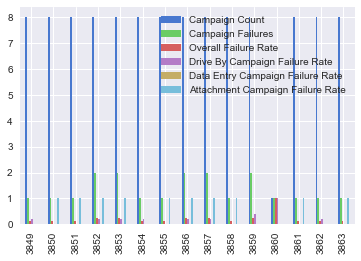

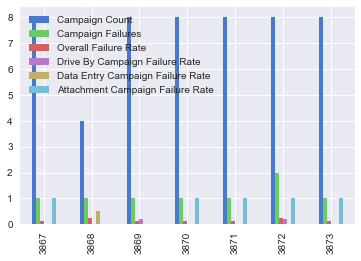

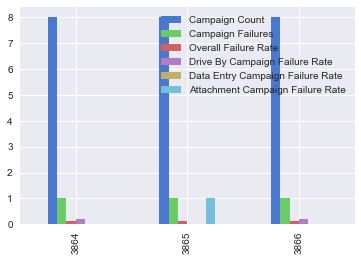

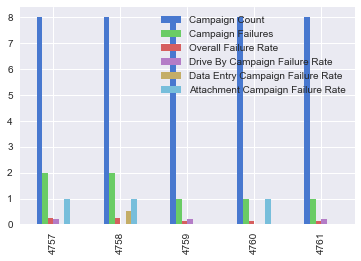

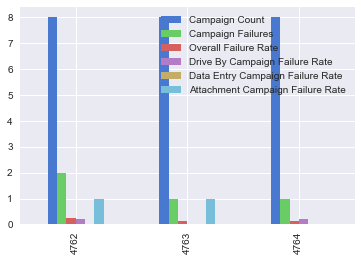

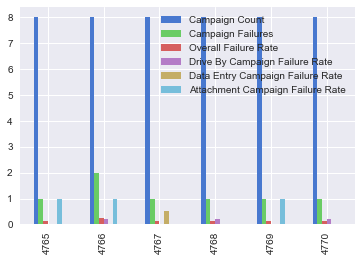

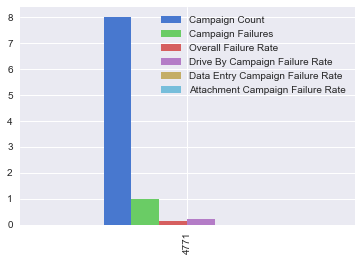

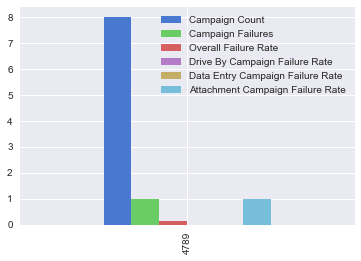

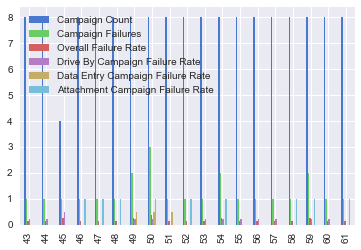

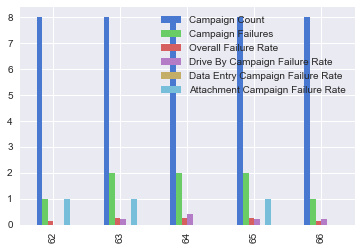

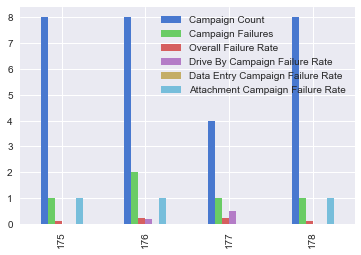

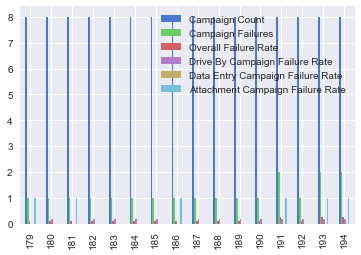

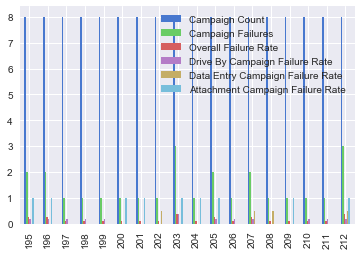

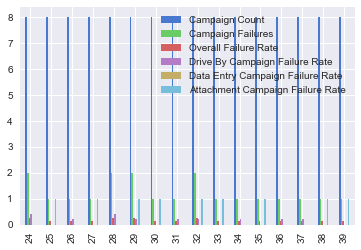

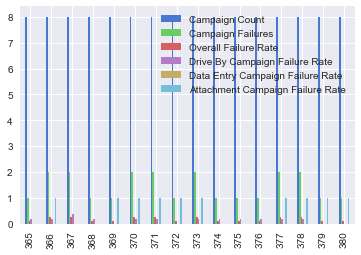

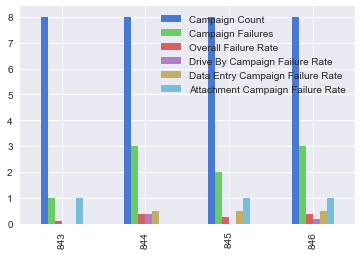

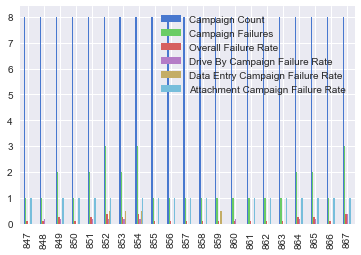

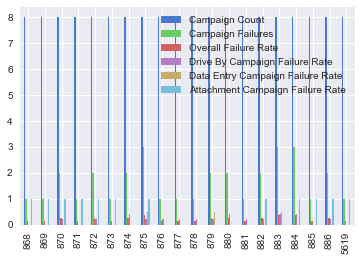

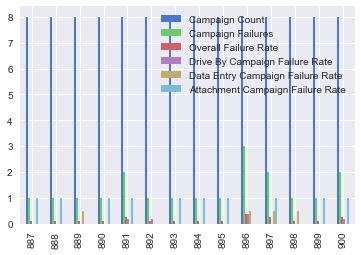

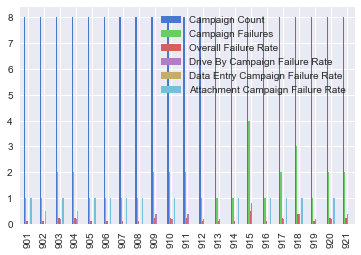

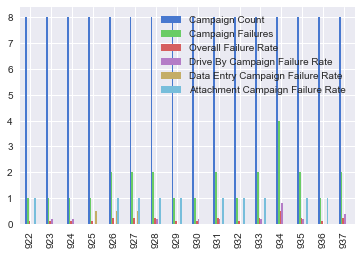

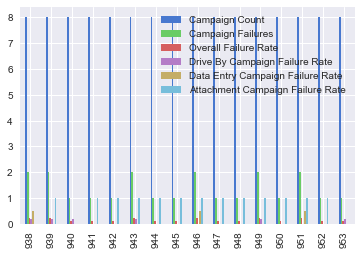

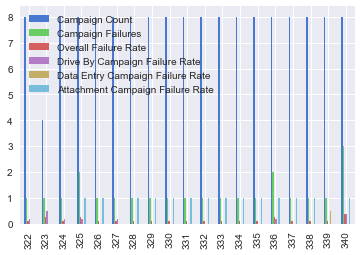

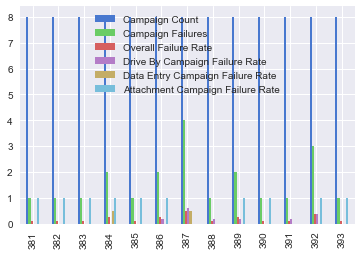

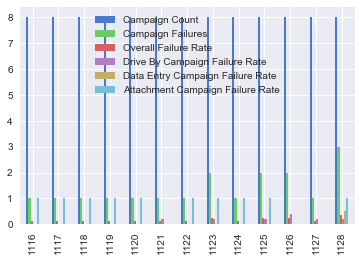

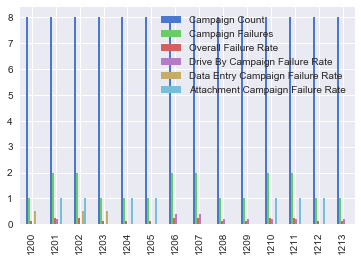

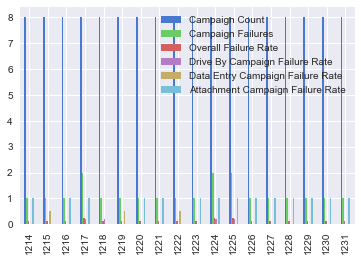

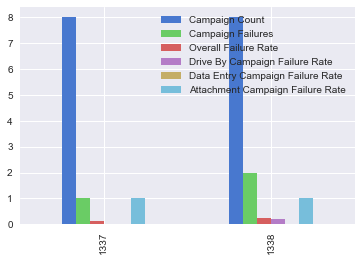

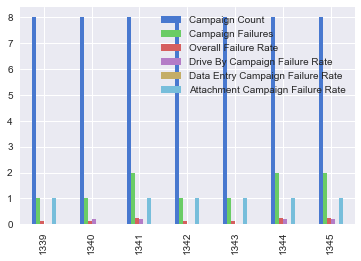

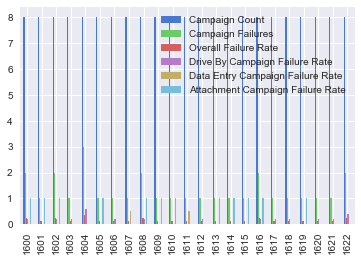

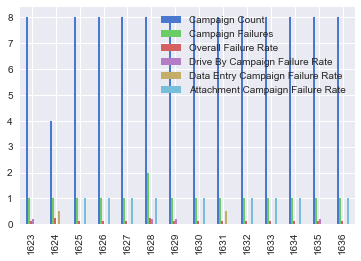

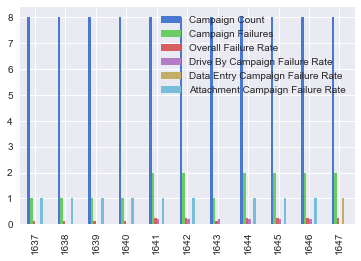

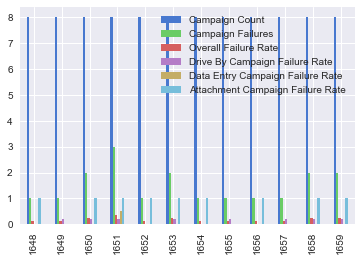

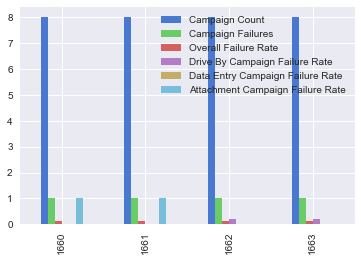

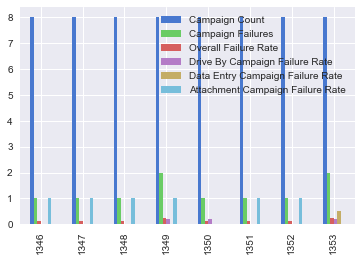

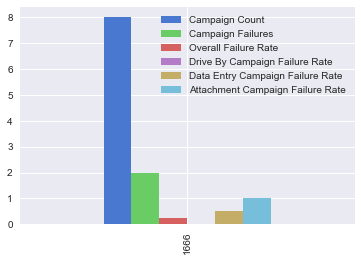

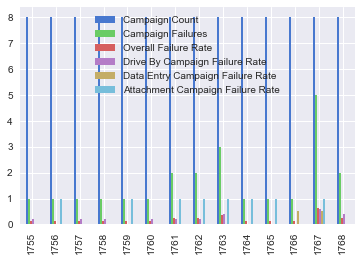

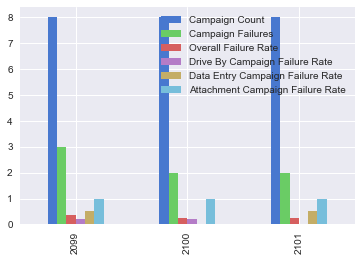

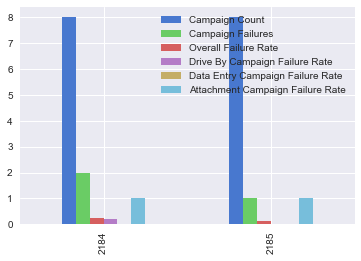

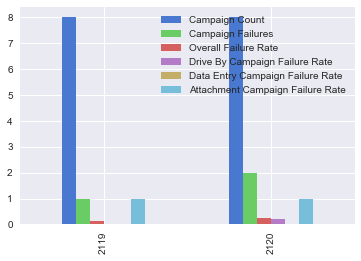

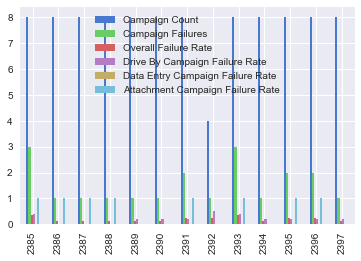

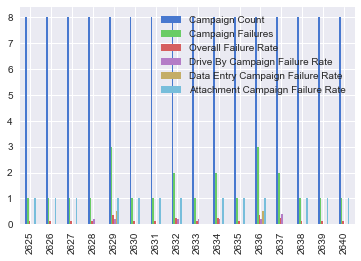

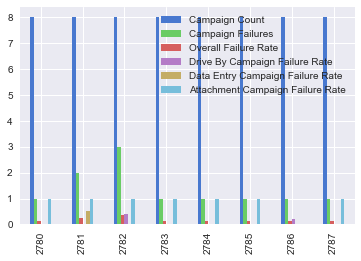

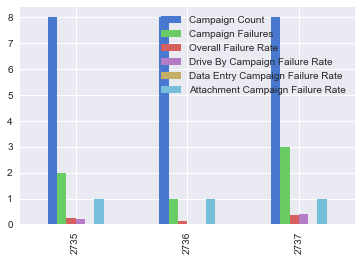

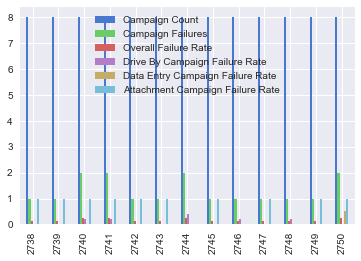

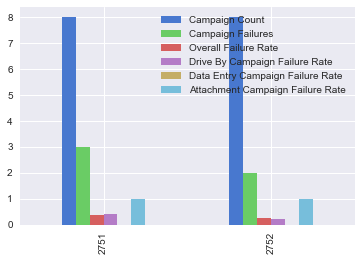

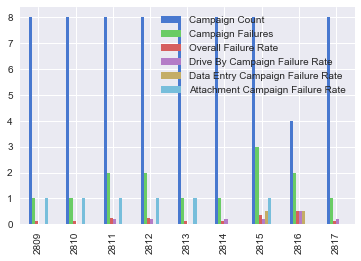

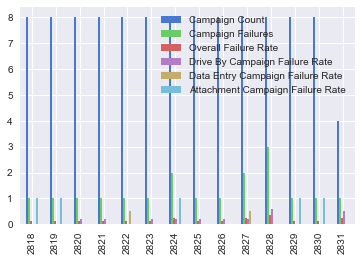

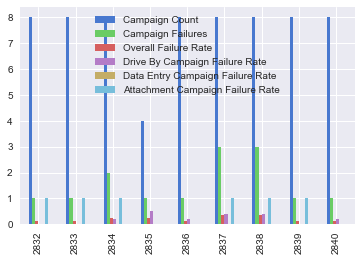

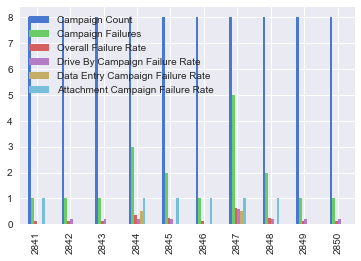

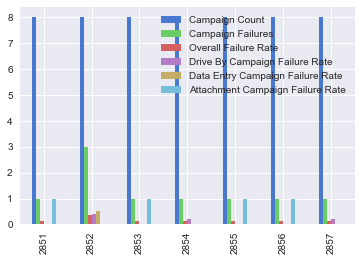

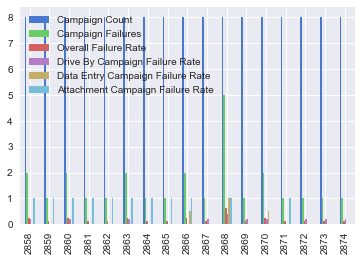

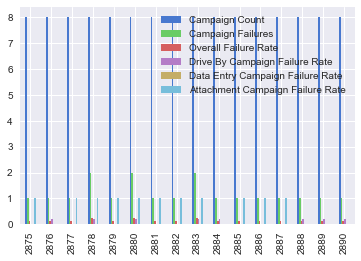

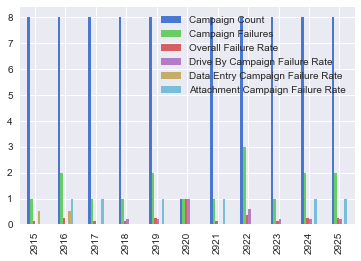

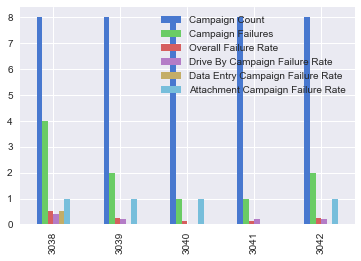

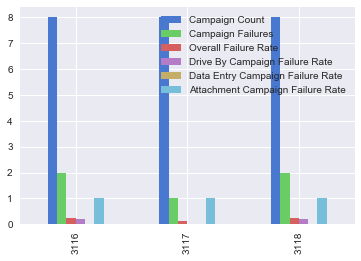

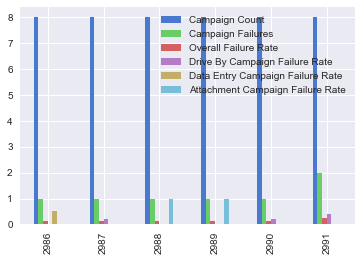

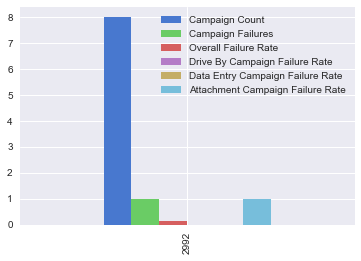

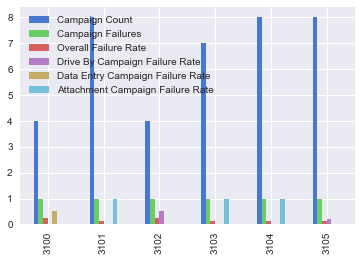

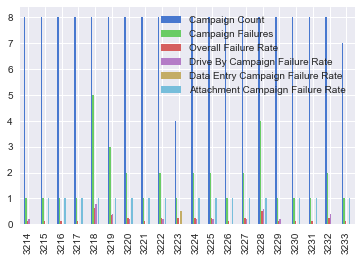

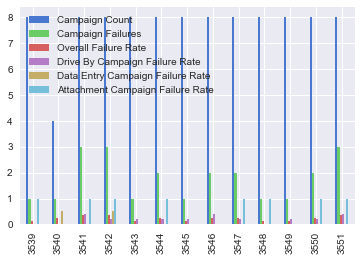

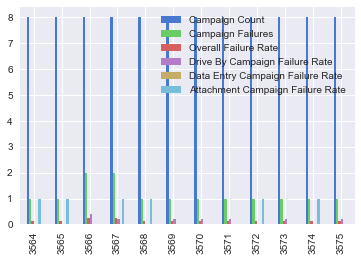

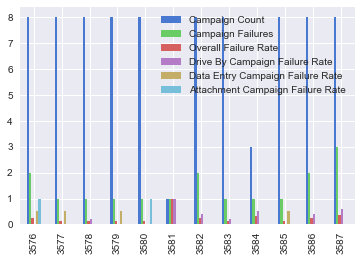

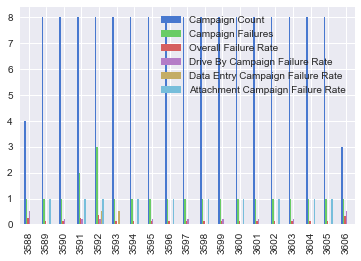

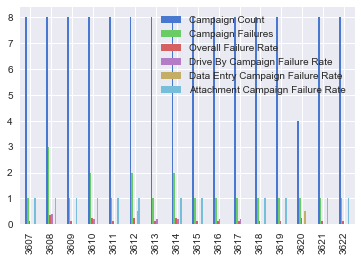

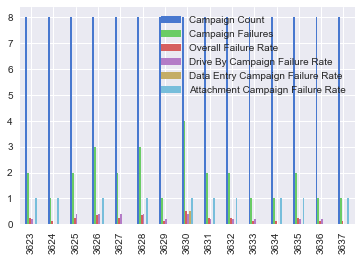

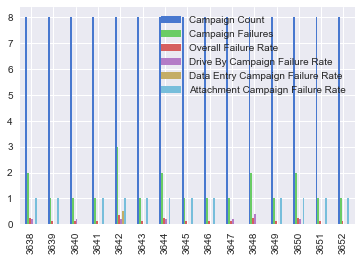

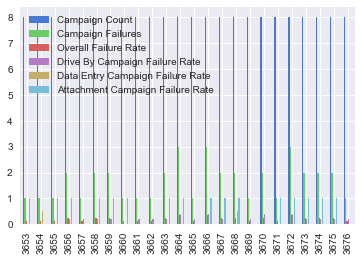

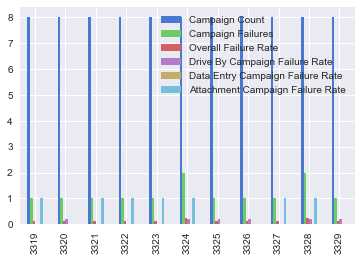

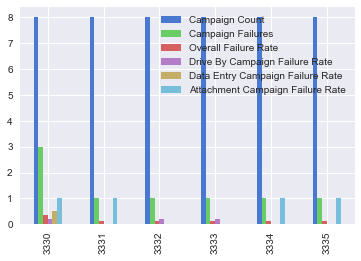

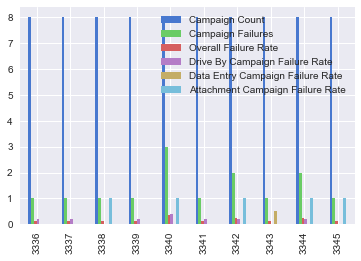

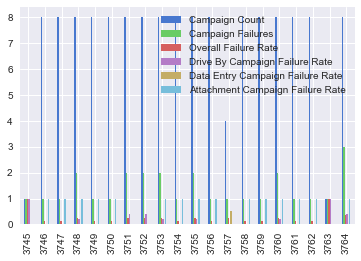

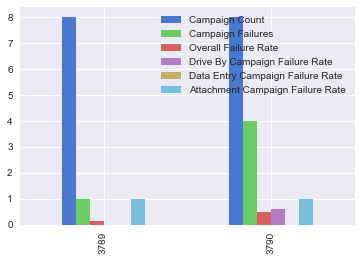

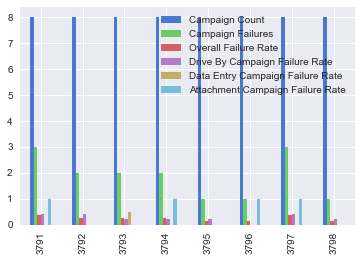

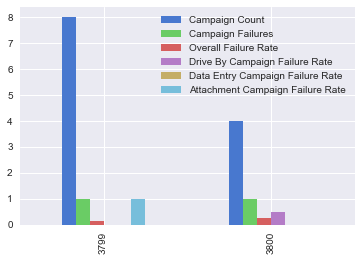

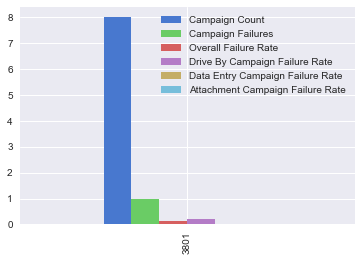

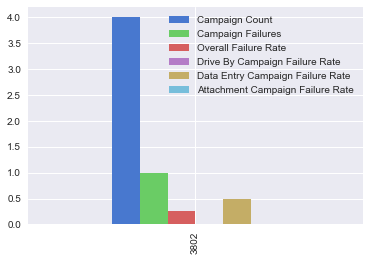

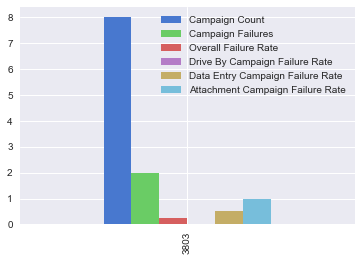

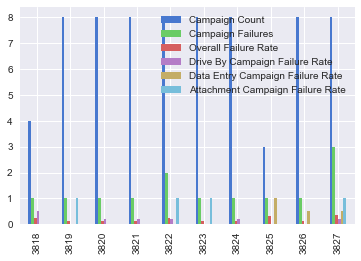

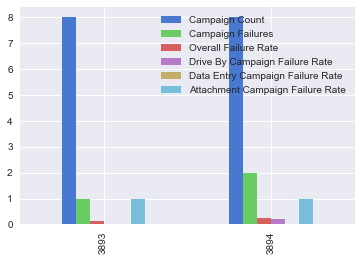

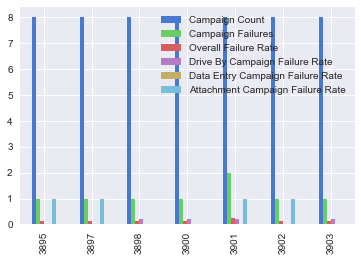

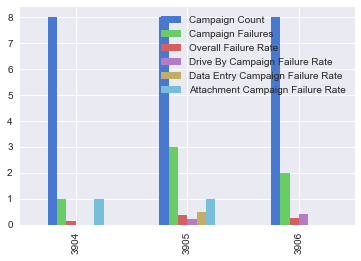

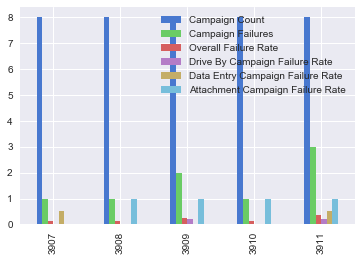

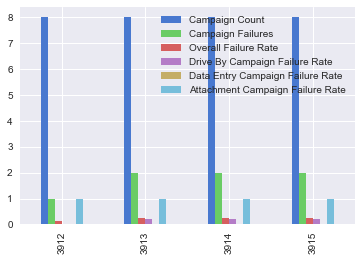

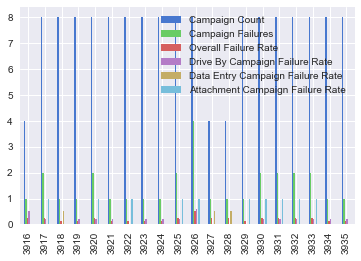

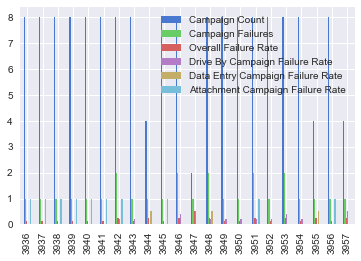

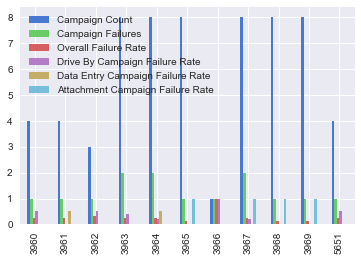

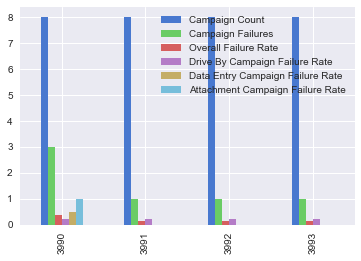

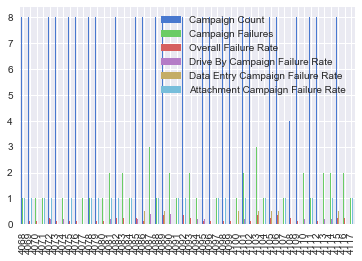

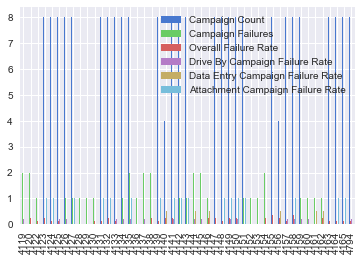

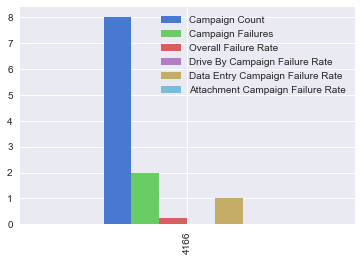

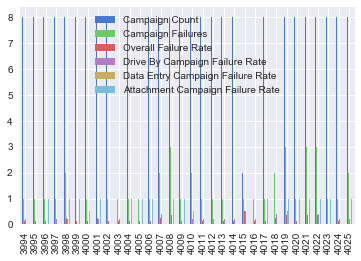

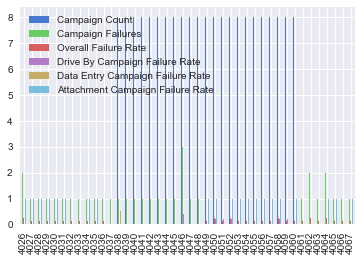

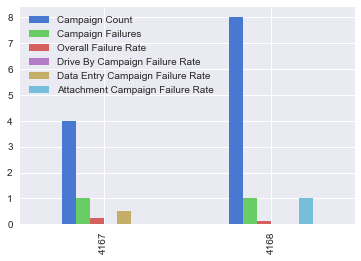

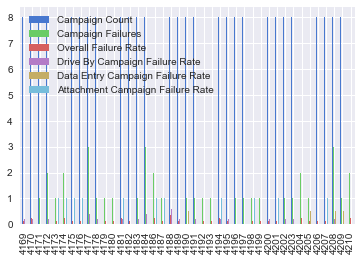

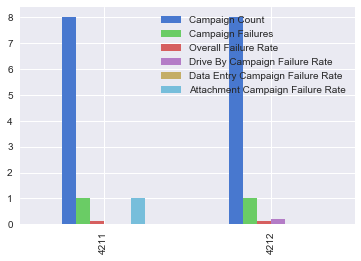

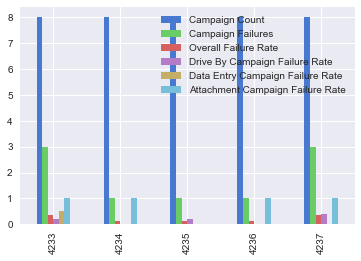

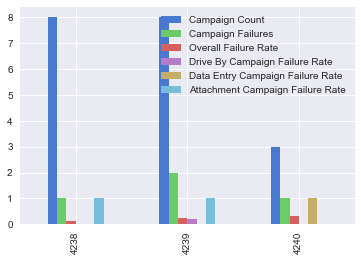

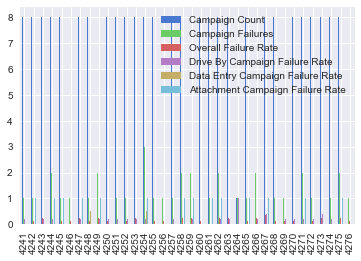

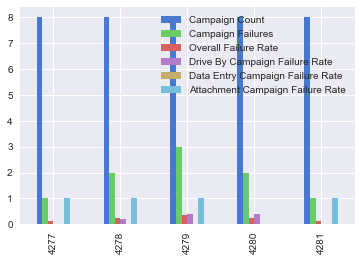

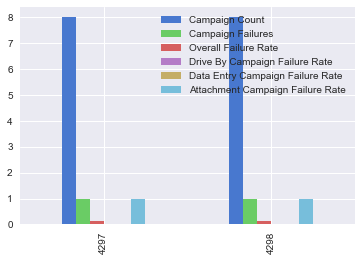

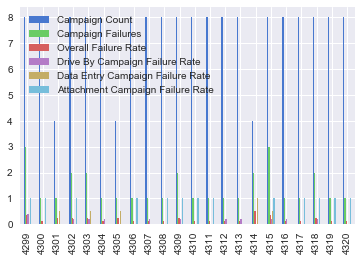

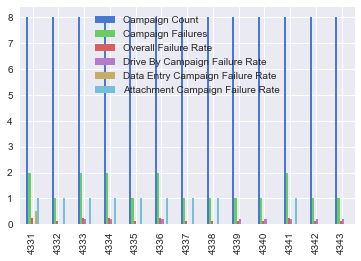

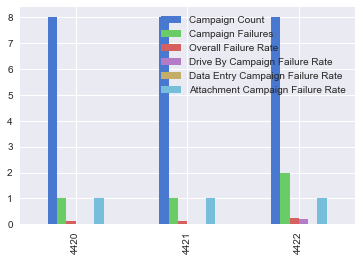

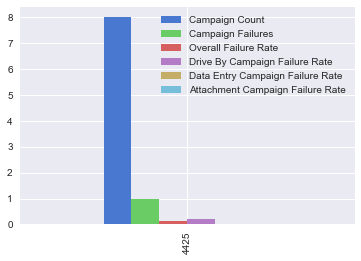

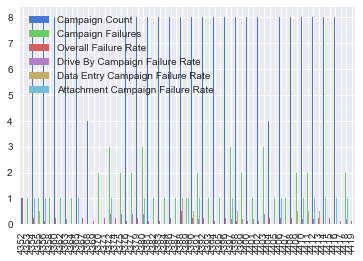

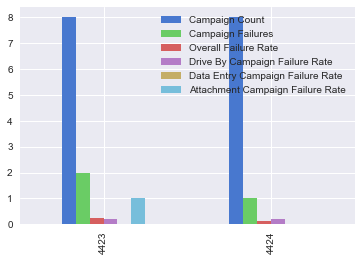

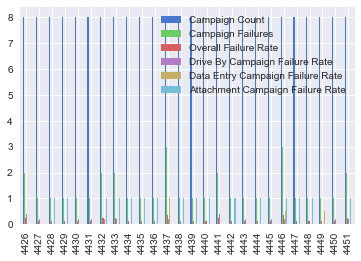

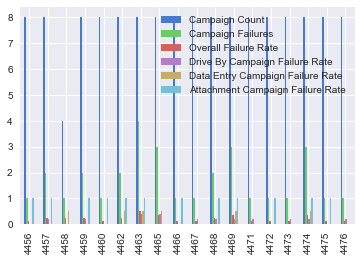

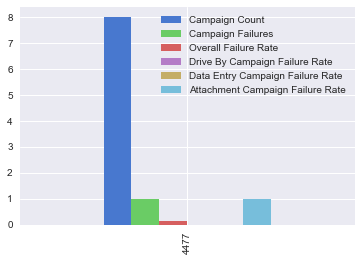

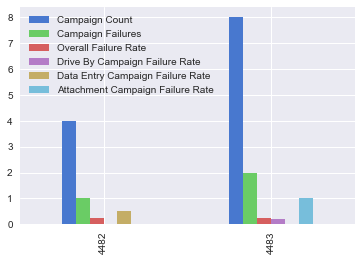

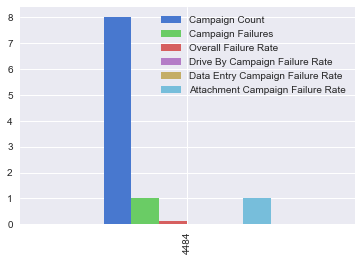

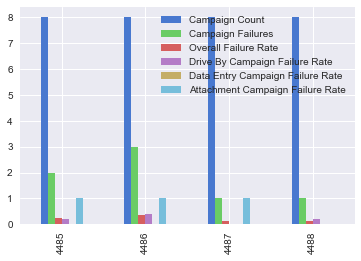

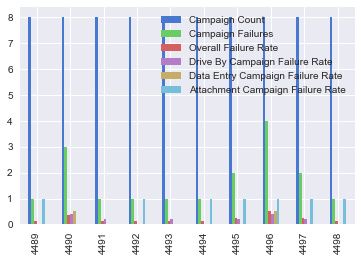

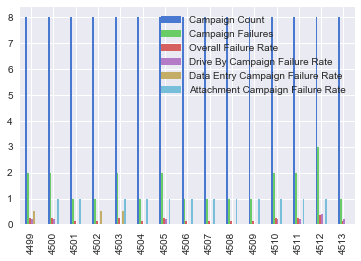

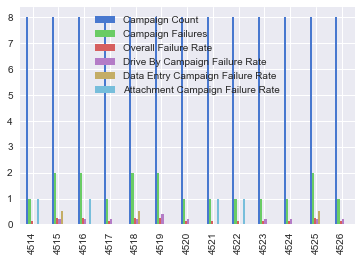

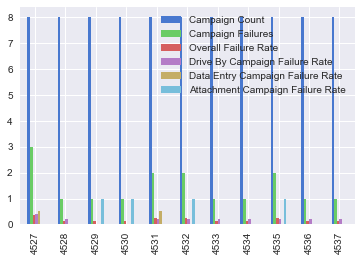

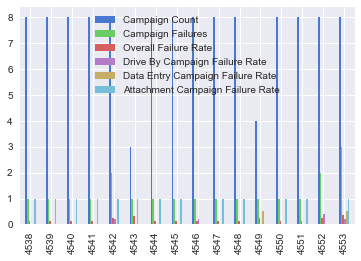

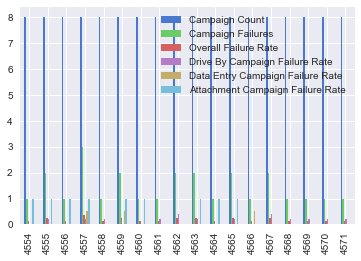

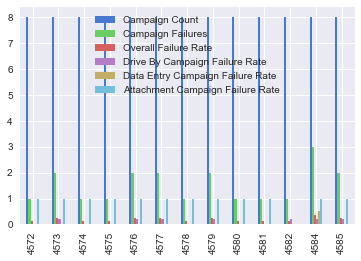

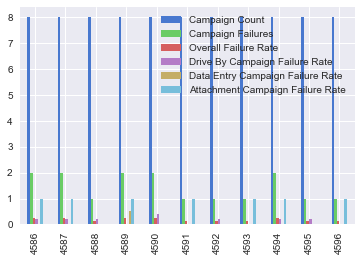

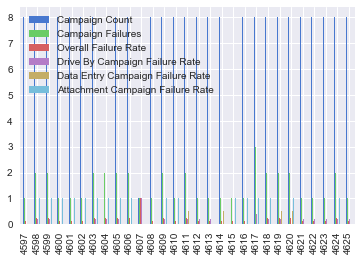

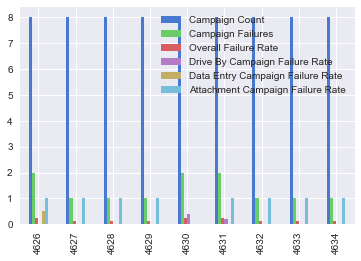

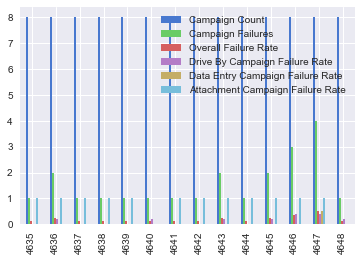

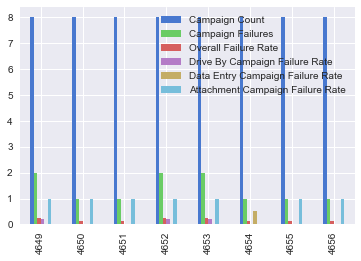

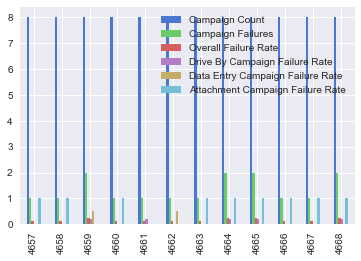

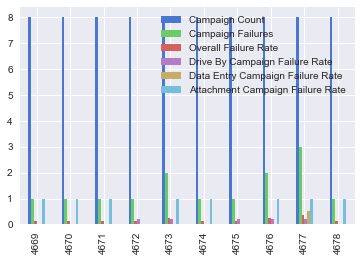

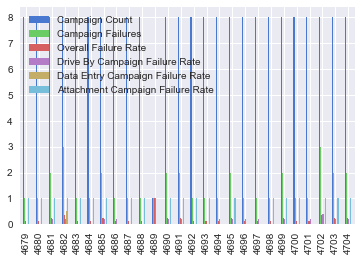

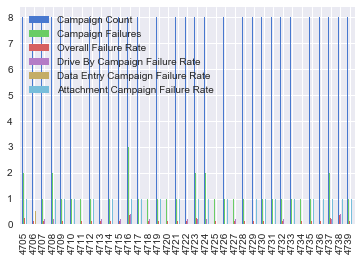

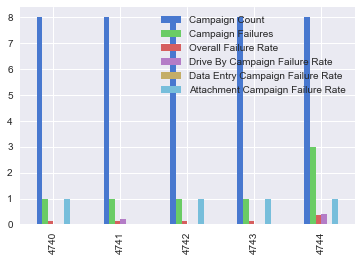

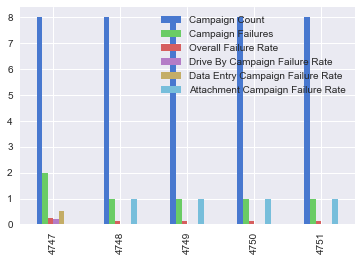

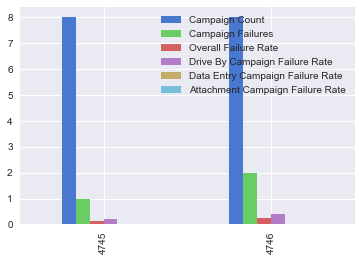

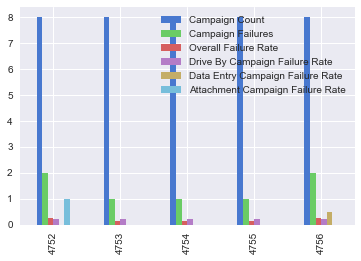

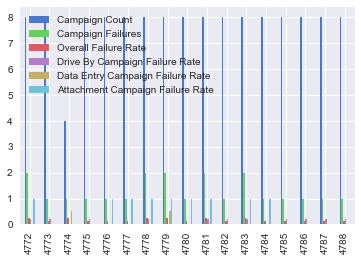

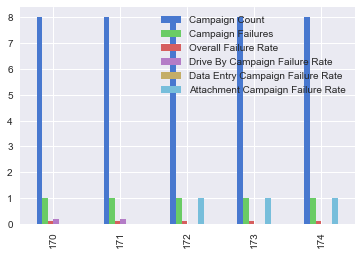

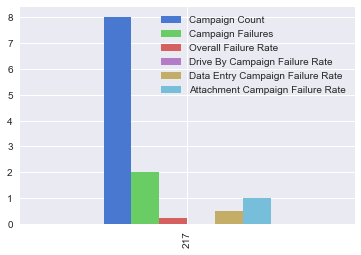

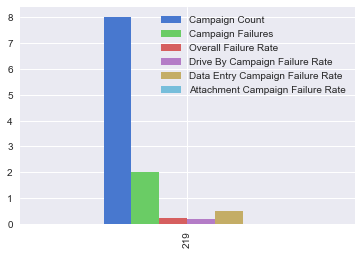

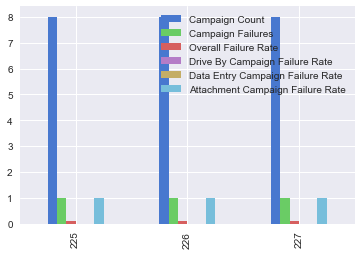

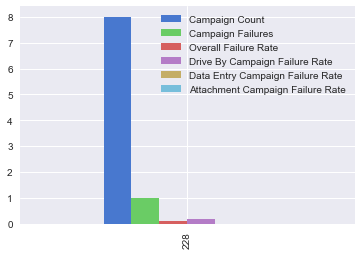

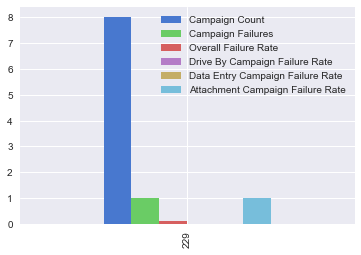

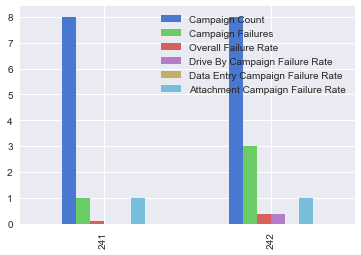

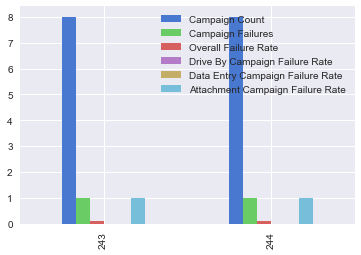

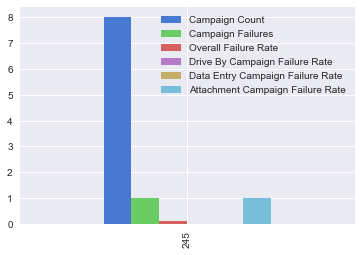

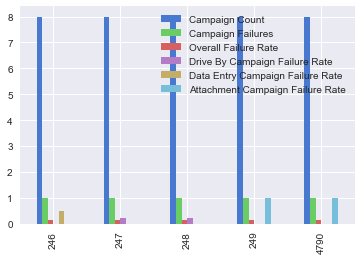

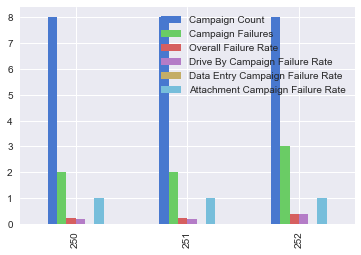

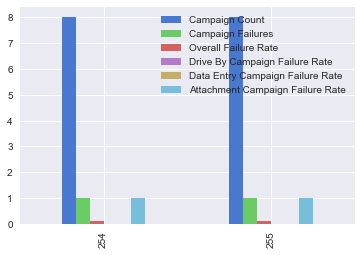

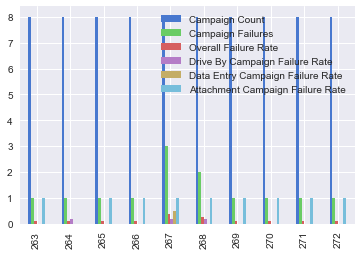

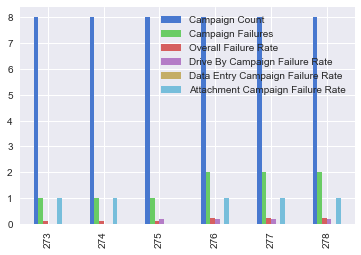

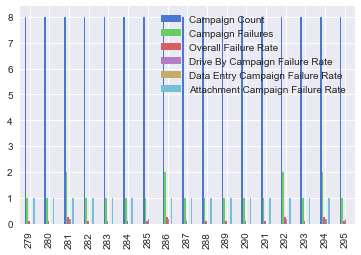

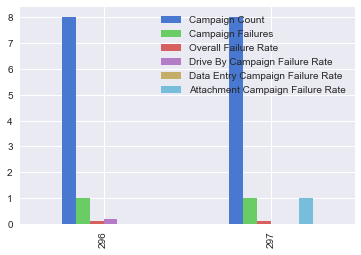

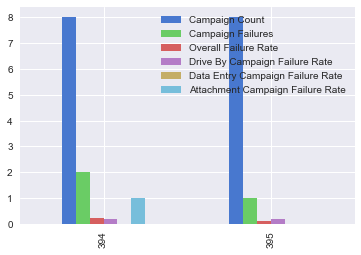

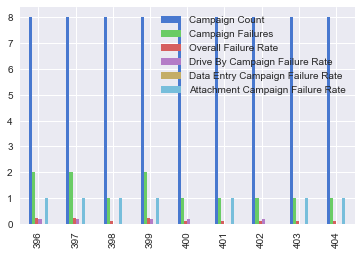

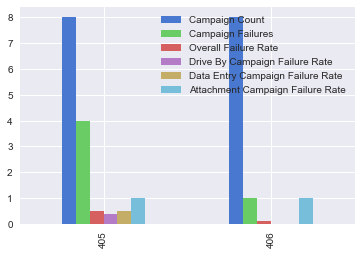

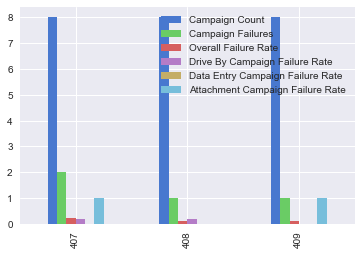

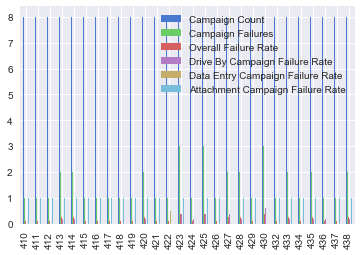

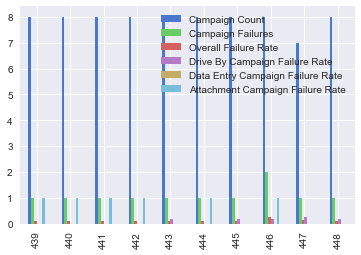

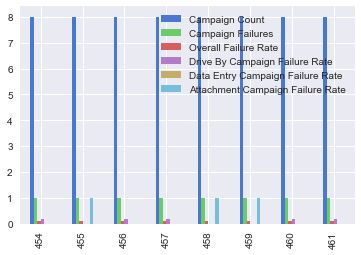

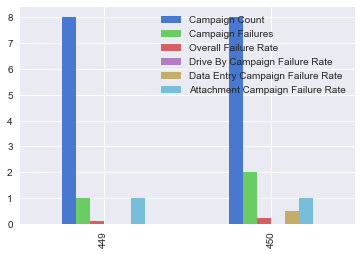

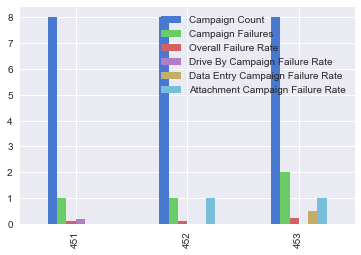

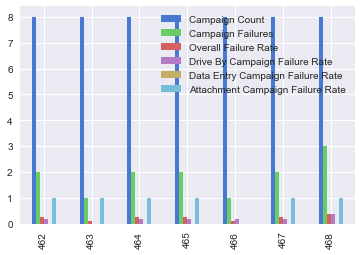

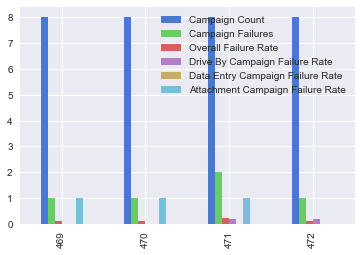

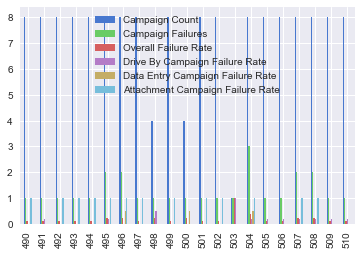

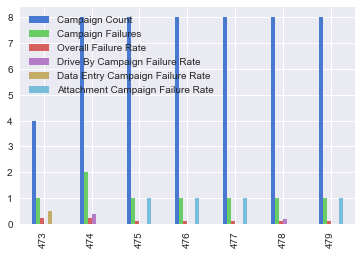

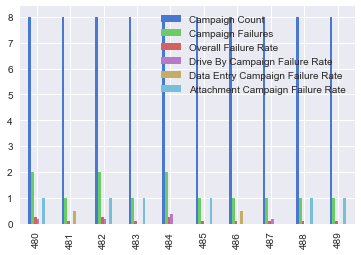

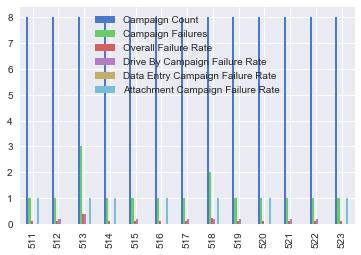

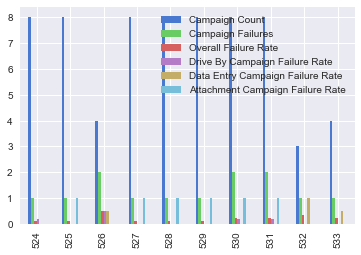

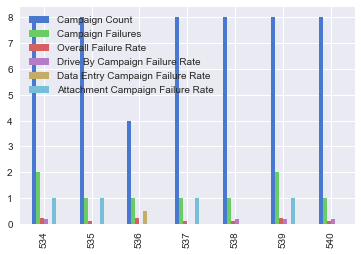

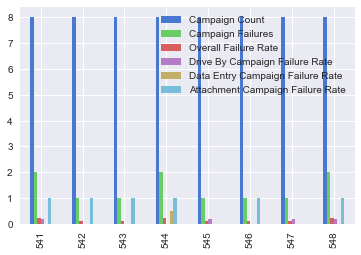

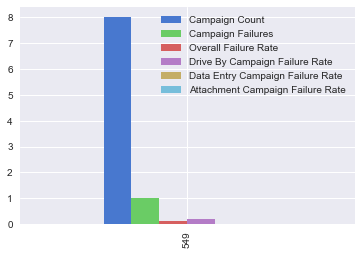

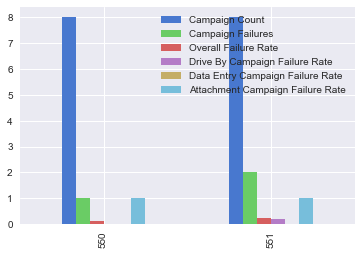

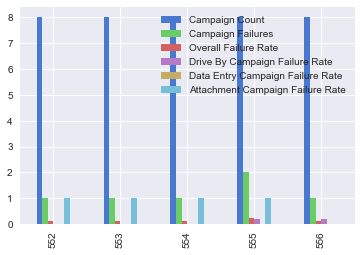

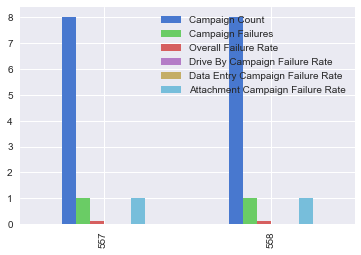

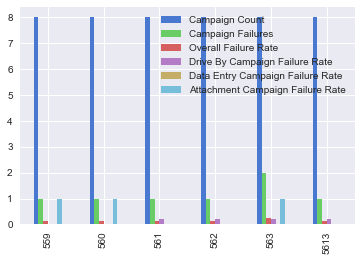

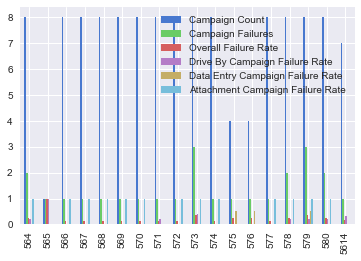

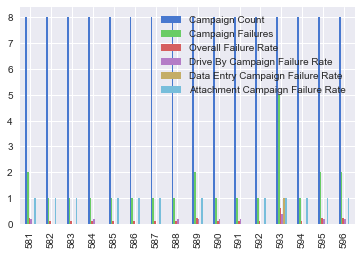

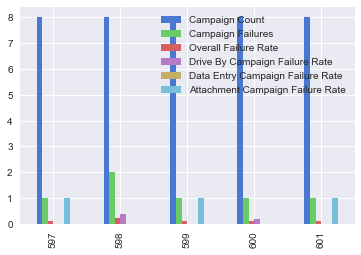

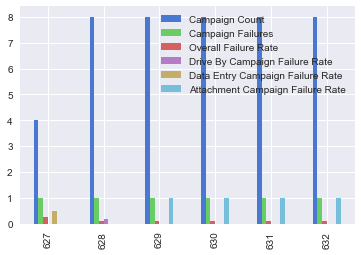

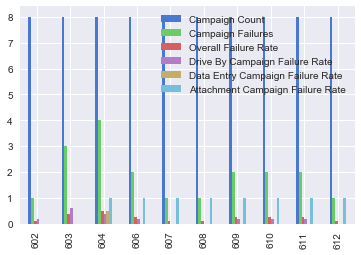

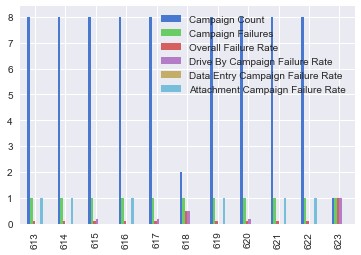

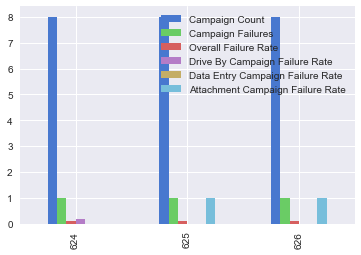

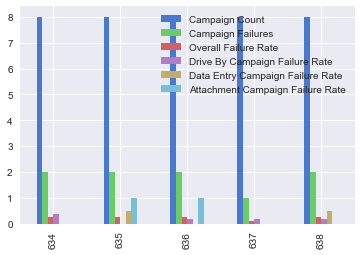

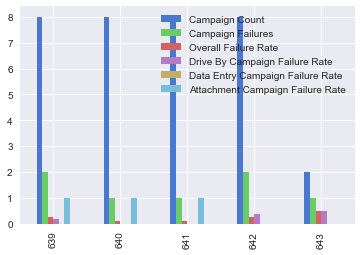

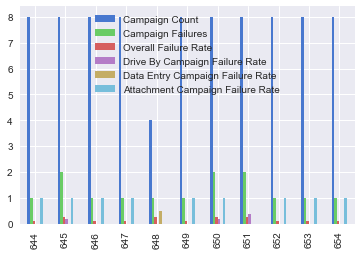

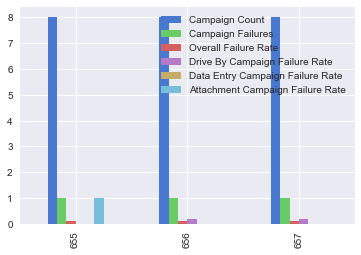

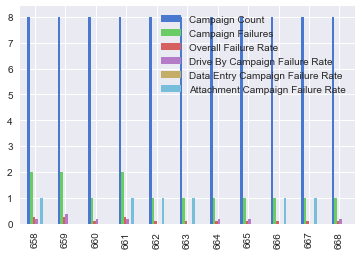

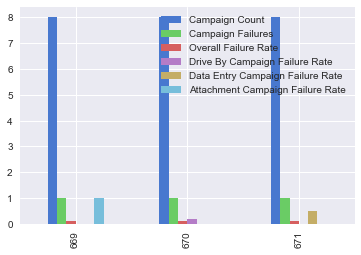

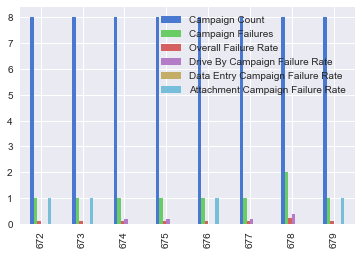

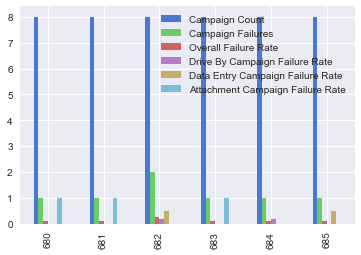

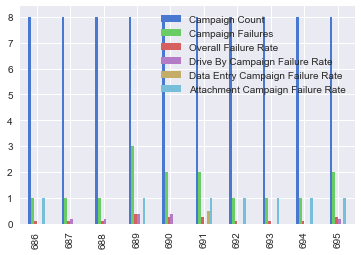

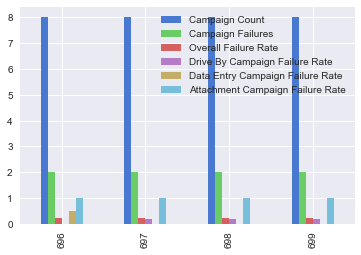

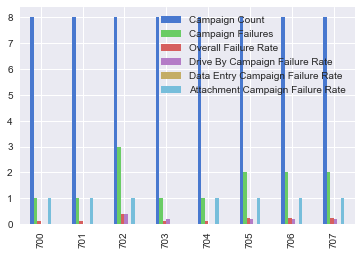

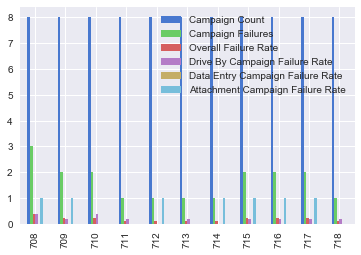

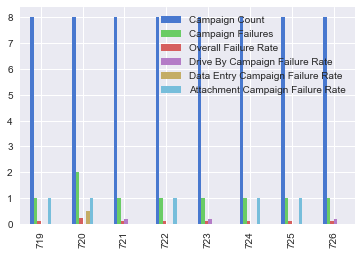

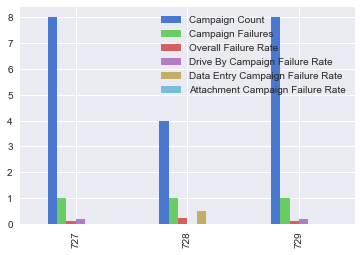

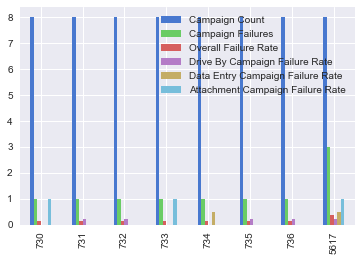

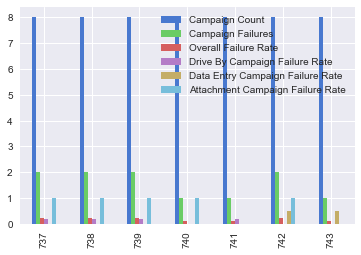

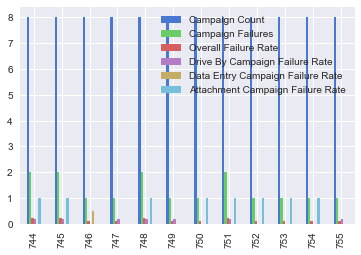

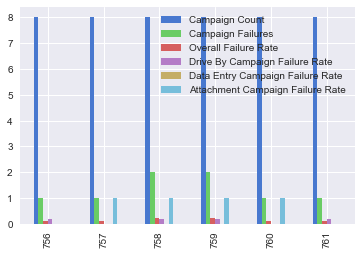

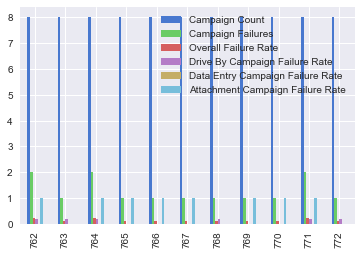

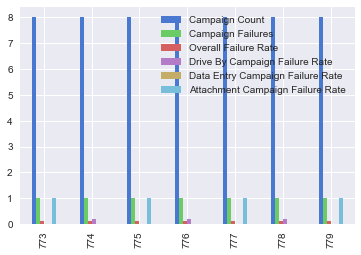

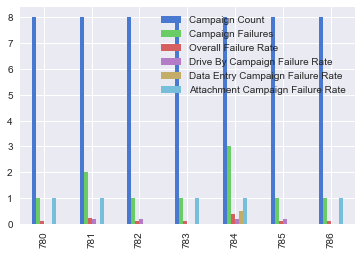

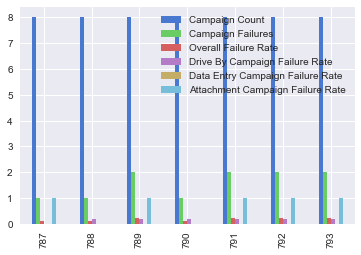

In [ ]:
# compare with bar plot
user_plot = user_failed.drop('Last Event Date', axis=1)
user_plot.groupby(['lvl1']).plot(kind='bar')

In [ ]:
user_failed.pivot_table('Campaign Failure Count', index='Department', columns='lvl1')

- What does NaN mean?
- Why might a value be missing?
- Why mark it as NaN? Why not mark it as a 0 or an empty string or a string saying "Unknown"?

In [9]:
# what are these counts? how does this work?
user_failed.isnull().sum()

First Name                            0
Last Name                             0
Email Address                         0
Department                           42
Active                               47
lvl1                                882
lv2                                 882
lv3                                 882
lv4                                 882
lv5                                 882
Campaign Count                        0
Campaign Failures                     0
Overall Failure Rate                  0
Drive By Campaign Failure Rate        0
Data Entry Campaign Failure Rate      0
Attachment Campaign Failure Rate      0
Last Event Date                       0
dtype: int64

In [10]:
(True == 1) and (False == 0)

True

In [62]:
import os
from IPython.display import Image, display, HTML

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [91]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [92]:
@interact
def describe(column=list(user_failed.columns)):
    print(user_failed[column].describe())

interactive(children=(Dropdown(description='column', options=('First Name', 'Last Name', 'Email Address', 'Dep…

In [93]:
@interact
def show_articles_more_than(column='Campaign Failures', x=3):
    display(HTML(f'<h2>user Failed with more than {x} {column}<h2>'))
    display(user_failed.loc[user_failed[column] > x, ['Email Address', 'Department', 'Active', 'lvl1', 'lv2']])

interactive(children=(Text(value='Campaign Failures', description='column'), IntSlider(value=3, description='x…

In [94]:
@interact
def scatter_plot(x=list(user_failed.select_dtypes('number').columns), 
                 y=list(user_failed.select_dtypes('number').columns)[1:]):
    user_failed.iplot(kind='scatter', x=x, y=y, mode='markers', 
             xTitle=x.title(), yTitle=y.title(), title=f'{y.title()} vs {x.title()}')

interactive(children=(Dropdown(description='x', options=('Campaign Count', 'Campaign Failures', 'Overall Failu…

In [102]:
@interact
def scatter_plot(x=list(user_failed.select_dtypes('number').columns), 
                 y=list(user_failed.select_dtypes('number').columns)[1:],
                 categories=['lvl1', 'lv2', 'lv3'],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    user_failed.iplot(kind='scatter', x=x, y=y, mode='markers', 
             categories=categories, 
             xTitle=x.title(), yTitle=y.title(), 
#             text='title',
             title=f'{y.title()} vs {x.title()}',
             theme=theme, colorscale=colorscale)

interactive(children=(Dropdown(description='x', options=('Campaign Count', 'Campaign Failures', 'Overall Failu…

# Plot Graph
## Line Chart

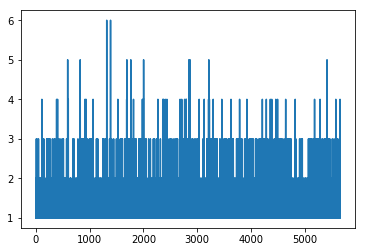

In [105]:
filteredData = user_failed[user_failed["Campaign Failures"] > 0]
filteredData["Campaign Failures"].plot()


# VERTICAL BAR GRAPH

First Name Last Name                  Email Address       Department Active  \
0       Greg   Tkaczyk   greg_tkaczyk@transcanada.com  AB Energy OP FO   True   
1       Luke    Harris    luke_harris@transcanada.com  AB Energy OP FO   True   
2       Mark    Kobasa    mark_kobasa@transcanada.com  AB Energy OP FO   True   
3       Ross  Phillips  ross_phillips@transcanada.com  AB Energy OP FO   True   
4      Shawn   Bradley  shawn_bradley@transcanada.com  AB Energy OP FO   True   

               lvl1         lv2              lv3             lv4  \
0  Francois Poirier  Sean Brett  Fareen Sunderji  Trevor Gelinas   
1  Francois Poirier  Sean Brett  Fareen Sunderji  Trevor Gelinas   
2  Francois Poirier  Sean Brett  Fareen Sunderji  Trevor Gelinas   
3  Francois Poirier  Sean Brett  Fareen Sunderji  Trevor Gelinas   
4  Francois Poirier  Sean Brett  Fareen Sunderji  Trevor Gelinas   

              lv5  Campaign Count  Campaign Failures  Overall Failure Rate  \
0  Charles Barter               8                  1                 0.125   
1   Shawn Bradley               8                  1                 0.125   
2      Paul Isaak               8                  2                 0.250   
3      Paul Isaak               8                  2                 0.250   
4               0               8                  1                 0.125   

   Drive By Campaign Failure Rate  Data Entry Campaign Failure Rate  \
0                             0.0                               0.0   
1                             0.0                               0.0   
2                             0.2                               0.0   
3                             0.2                               0.0   
4                             0.0                               0.0   

   Attachment Campaign Failure Rate Last Event Date  
0                               1.0      2018-09-13  
1                               1.0      2018-09-13  
2                               1.0      2018-06-29  
3                               1.0      2018-03-01  
4                               1.0      2018-04-28

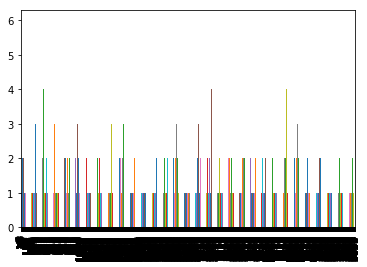

In [107]:
filteredData.head()
filteredData["Campaign Failures"].plot(kind='bar')

# Horizontal BAR Graph

First Name Last Name                  Email Address       Department Active  \
0       Greg   Tkaczyk   greg_tkaczyk@transcanada.com  AB Energy OP FO   True   
1       Luke    Harris    luke_harris@transcanada.com  AB Energy OP FO   True   
2       Mark    Kobasa    mark_kobasa@transcanada.com  AB Energy OP FO   True   
3       Ross  Phillips  ross_phillips@transcanada.com  AB Energy OP FO   True   
4      Shawn   Bradley  shawn_bradley@transcanada.com  AB Energy OP FO   True   

               lvl1         lv2              lv3             lv4  \
0  Francois Poirier  Sean Brett  Fareen Sunderji  Trevor Gelinas   
1  Francois Poirier  Sean Brett  Fareen Sunderji  Trevor Gelinas   
2  Francois Poirier  Sean Brett  Fareen Sunderji  Trevor Gelinas   
3  Francois Poirier  Sean Brett  Fareen Sunderji  Trevor Gelinas   
4  Francois Poirier  Sean Brett  Fareen Sunderji  Trevor Gelinas   

              lv5  Campaign Count  Campaign Failures  Overall Failure Rate  \
0  Charles Barter               8                  1                 0.125   
1   Shawn Bradley               8                  1                 0.125   
2      Paul Isaak               8                  2                 0.250   
3      Paul Isaak               8                  2                 0.250   
4               0               8                  1                 0.125   

   Drive By Campaign Failure Rate  Data Entry Campaign Failure Rate  \
0                             0.0                               0.0   
1                             0.0                               0.0   
2                             0.2                               0.0   
3                             0.2                               0.0   
4                             0.0                               0.0   

   Attachment Campaign Failure Rate Last Event Date  
0                               1.0      2018-09-13  
1                               1.0      2018-09-13  
2                               1.0      2018-06-29  
3                               1.0      2018-03-01  
4                               1.0      2018-04-28

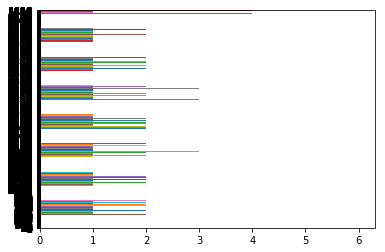

In [108]:
filteredData["Campaign Failures"].plot(kind='barh')

# Pie Chart

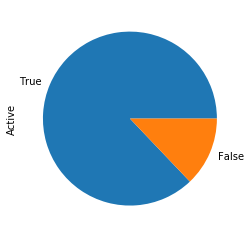

In [34]:
filteredData["Campaign Failures"].plot(kind='pie')

## 1. Remove the column that only contains missing values ([video](https://www.youtube.com/watch?v=TW5RqdDBasg&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=2))

In [9]:
# axis=1 also works, inplace is False by default, inplace=True avoids assignment statement
ri.drop('county_name', axis='columns', inplace=True)

In [10]:
ri.shape

(91741, 14)

In [11]:
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [12]:
# alternative method
ri.dropna(axis='columns', how='all').shape

(91741, 14)

Lessons:

- Pay attention to default arguments
- Check your work
- There is more than one way to do everything in pandas

## 2. Do men or women speed more often? ([video](https://www.youtube.com/watch?v=d0oBRIONOEw&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=3))

In [13]:
# when someone is stopped for speeding, how often is it a man or woman?
ri[ri.violation == 'Speeding'].driver_gender.value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [14]:
# alternative
ri.loc[ri.violation == 'Speeding', 'driver_gender'].value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [15]:
# when a man is pulled over, how often is it for speeding?
ri[ri.driver_gender == 'M'].violation.value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [16]:
# repeat for women
ri[ri.driver_gender == 'F'].violation.value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [17]:
# combines the two lines above
ri.groupby('driver_gender').violation.value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

What are some relevant facts that we don't know?

Lessons:

- There is more than one way to understand a question

## 3. Does gender affect who gets searched during a stop? ([video](https://www.youtube.com/watch?v=WzpGq1X5U1M&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=4))

In [18]:
# ignore gender for the moment
ri.search_conducted.value_counts(normalize=True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [19]:
# how does this work?
ri.search_conducted.mean()

0.03483720473942948

In [20]:
# search rate by gender
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

Does this prove that gender affects who gets searched?

In [21]:
# include a second factor
ri.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

Does this prove causation?

Lessons:

- Causation is difficult to conclude, so focus on relationships
- Include all relevant factors when studying a relationship

## 4. Why is search_type missing so often? ([video](https://www.youtube.com/watch?v=3D6smaE9c-g&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=5))

In [22]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [23]:
# maybe search_type is missing any time search_conducted is False?
ri.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [24]:
# test that theory, why is the Series empty?
ri[ri.search_conducted == False].search_type.value_counts()

Series([], Name: search_type, dtype: int64)

In [25]:
# value_counts ignores missing values by default
ri[ri.search_conducted == False].search_type.value_counts(dropna=False)

NaN    88545
Name: search_type, dtype: int64

In [26]:
# when search_conducted is True, search_type is never missing
ri[ri.search_conducted == True].search_type.value_counts(dropna=False)

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Probable Cause,Protective Frisk                               33
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Protective Frisk,Reasonable Suspicion                         11
Incident to Arrest,Invent

In [27]:
# alternative
ri[ri.search_conducted == True].search_type.isnull().sum()

0

Lessons:

- Verify your assumptions about your data
- pandas functions ignore missing values by default

## 5. During a search, how often is the driver frisked? ([video](https://www.youtube.com/watch?v=4tTO_xH4aQE&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=6))

In [28]:
# multiple types are separated by commas
ri.search_type.value_counts(dropna=False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Probable Cause,Protective Frisk                                33
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Protective Frisk,Reasonable Suspicion                          11
Incident t

In [29]:
# use bracket notation when creating a column
ri['frisk'] = ri.search_type == 'Protective Frisk'

In [30]:
ri.frisk.dtype

dtype('bool')

In [31]:
# includes exact matches only
ri.frisk.sum()

161

In [32]:
# is this the answer?
ri.frisk.mean()

0.0017549405391264537

In [33]:
# uses the wrong denominator (includes stops that didn't involve a search)
ri.frisk.value_counts()

False    91580
True       161
Name: frisk, dtype: int64

In [34]:
161 / (91580 + 161)

0.0017549405391264537

In [35]:
# includes partial matches
ri['frisk'] = ri.search_type.str.contains('Protective Frisk')

In [36]:
# seems about right
ri.frisk.sum()

274

In [37]:
# frisk rate during a search
ri.frisk.mean()

0.08573216520650813

In [38]:
# str.contains preserved missing values from search_type
ri.frisk.value_counts(dropna=False)

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

In [39]:
# excludes stops that didn't involve a search
274 / (2922 + 274)

0.08573216520650813

Lessons:

- Use string methods to find partial matches
- Use the correct denominator when calculating rates
- pandas calculations ignore missing values
- Apply the "smell test" to your results

## 6. Which year had the least number of stops? ([video](https://www.youtube.com/watch?v=W0zGzXQmE7c&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=7))

In [40]:
# this works, but there's a better way
ri.stop_date.str.slice(0, 4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [41]:
# make sure you create this column
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)

In [42]:
ri.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
frisk                         object
stop_datetime         datetime64[ns]
dtype: object

In [43]:
# why is 2005 so much smaller?
ri.stop_datetime.dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

Lessons:

- Consider removing chunks of data that may be biased
- Use the datetime data type for dates and times

## 7. How does drug activity change by time of day? ([video](https://www.youtube.com/watch?v=jV24N7SPXEU&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=8))

In [44]:
ri.drugs_related_stop.dtype

dtype('bool')

In [45]:
# baseline rate
ri.drugs_related_stop.mean()

0.008883705213590434

In [46]:
# can't groupby 'hour' unless you create it as a column
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean()

stop_datetime
0     0.019728
1     0.013507
2     0.015462
3     0.017065
4     0.011811
5     0.004762
6     0.003040
7     0.003281
8     0.002687
9     0.006288
10    0.005714
11    0.006976
12    0.004467
13    0.010326
14    0.007810
15    0.006416
16    0.005723
17    0.005517
18    0.010148
19    0.011596
20    0.008084
21    0.013342
22    0.013533
23    0.016344
Name: drugs_related_stop, dtype: float64

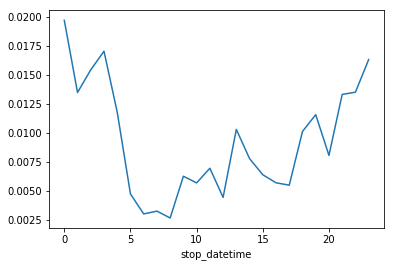

In [47]:
# line plot by default (for a Series)
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

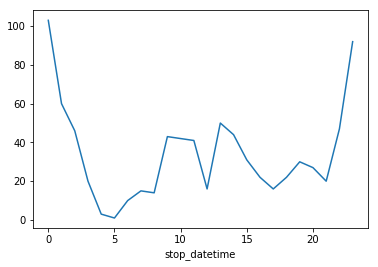

In [48]:
# alternative: count drug-related stops by hour
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.sum().plot()

Lessons:

- Use plots to help you understand trends
- Create exploratory plots using pandas one-liners

## 8. Do most stops occur at night? ([video](https://www.youtube.com/watch?v=GsQ6x3pt2w4&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=9))

In [49]:
ri.stop_datetime.dt.hour.value_counts()

10    7350
9     6838
11    5877
14    5634
23    5629
0     5221
8     5210
13    4842
15    4832
7     4572
1     4442
16    3844
12    3582
22    3473
20    3340
6     3290
2     2975
17    2900
19    2587
18    2168
21    1499
3     1172
4      254
5      210
Name: stop_datetime, dtype: int64

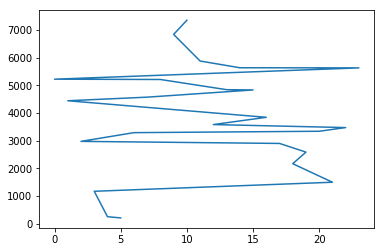

In [50]:
ri.stop_datetime.dt.hour.value_counts().plot()

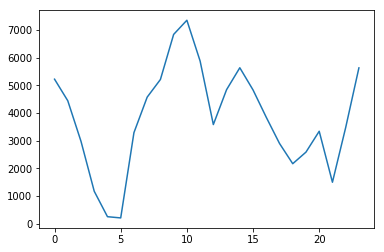

In [51]:
ri.stop_datetime.dt.hour.value_counts().sort_index().plot()

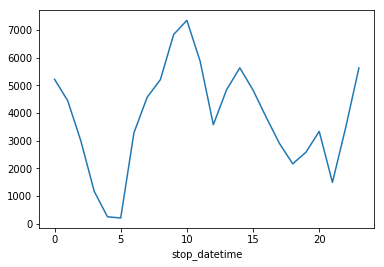

In [52]:
# alternative method
ri.groupby(ri.stop_datetime.dt.hour).stop_date.count().plot()

Lessons:

- Be conscious of sorting when plotting

## 9. Find the bad data in the stop_duration column and fix it ([video](https://www.youtube.com/watch?v=8U8ob9bXakY&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=10))

In [53]:
# mark bad data as missing
ri.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [54]:
# what four things are wrong with this code?
# ri[ri.stop_duration == 1 | ri.stop_duration == 2].stop_duration = 'NaN'

In [55]:
# what two things are still wrong with this code?
ri[(ri.stop_duration == '1') | (ri.stop_duration == '2')].stop_duration = 'NaN'

C:\Users\justm\AppData\Local\conda\conda\envs\pd22.0\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [56]:
# assignment statement did not work
ri.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [57]:
# solves SettingWithCopyWarning
ri.loc[(ri.stop_duration == '1') | (ri.stop_duration == '2'), 'stop_duration'] = 'NaN'

In [58]:
# confusing!
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

In [59]:
# replace 'NaN' string with actual NaN value
import numpy as np
ri.loc[ri.stop_duration == 'NaN', 'stop_duration'] = np.nan

In [60]:
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

In [61]:
# alternative method
ri.stop_duration.replace(['1', '2'], value=np.nan, inplace=True)

Lessons:

- Ambiguous data should be marked as missing
- Don't ignore the SettingWithCopyWarning
- NaN is not a string

## 10. What is the mean stop_duration for each violation_raw?

In [62]:
# make sure you create this column
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}
ri['stop_minutes'] = ri.stop_duration.map(mapping)

In [63]:
# matches value_counts for stop_duration
ri.stop_minutes.value_counts()

8.0     69543
23.0    13635
45.0     3228
Name: stop_minutes, dtype: int64

In [64]:
ri.groupby('violation_raw').stop_minutes.mean()

violation_raw
APB                                 20.987342
Call for Service                    22.034669
Equipment/Inspection Violation      11.460345
Motorist Assist/Courtesy            16.916256
Other Traffic Violation             13.900265
Registration Violation              13.745629
Seatbelt Violation                   9.741531
Special Detail/Directed Patrol      15.061100
Speeding                            10.577690
Suspicious Person                   18.750000
Violation of City/Town Ordinance    13.388626
Warrant                             21.400000
Name: stop_minutes, dtype: float64

In [65]:
ri.groupby('violation_raw').stop_minutes.agg(['mean', 'count'])

mean  count
violation_raw                                     
APB                               20.987342     79
Call for Service                  22.034669   1298
Equipment/Inspection Violation    11.460345  11020
Motorist Assist/Courtesy          16.916256    203
Other Traffic Violation           13.900265  16223
Registration Violation            13.745629   3432
Seatbelt Violation                 9.741531   2952
Special Detail/Directed Patrol    15.061100   2455
Speeding                          10.577690  48462
Suspicious Person                 18.750000     56
Violation of City/Town Ordinance  13.388626    211
Warrant                           21.400000     15

Lessons:

- Convert strings to numbers for analysis
- Approximate when necessary
- Use count with mean to looking for meaningless means

## 11. Plot the results of the first groupby from the previous exercise

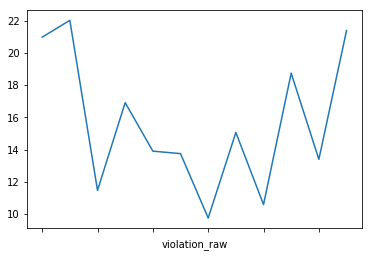

In [66]:
# what's wrong with this?
ri.groupby('violation_raw').stop_minutes.mean().plot()

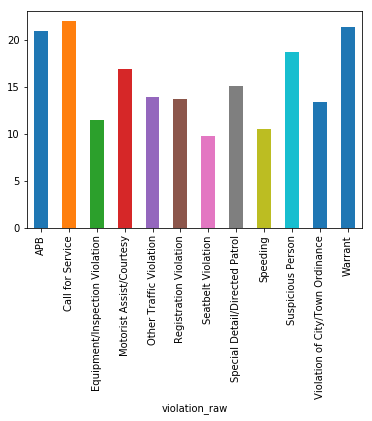

In [67]:
# how could this be made better?
ri.groupby('violation_raw').stop_minutes.mean().plot(kind='bar')

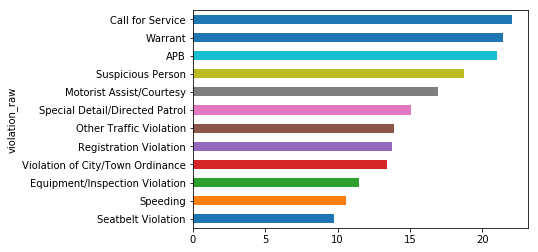

In [68]:
ri.groupby('violation_raw').stop_minutes.mean().sort_values().plot(kind='barh')

Lessons:

- Don't use a line plot to compare categories
- Be conscious of sorting and orientation when plotting

## 12. Compare the age distributions for each violation

In [69]:
# good first step
ri.groupby('violation').driver_age.describe()

count       mean        std   min   25%   50%   75%  \
violation                                                                    
Equipment            11007.0  31.781503  11.400900  16.0  23.0  28.0  38.0   
Moving violation     16164.0  36.120020  13.185805  15.0  25.0  33.0  46.0   
Other                 4204.0  39.536870  13.034639  16.0  28.0  39.0  49.0   
Registration/plates   3427.0  32.803035  11.033675  16.0  24.0  30.0  40.0   
Seat belt             2952.0  32.206301  11.213122  17.0  24.0  29.0  38.0   
Speeding             48361.0  33.530097  12.821847  15.0  23.0  30.0  42.0   

                      max  
violation                  
Equipment            89.0  
Moving violation     99.0  
Other                87.0  
Registration/plates  74.0  
Seat belt            77.0  
Speeding             90.0

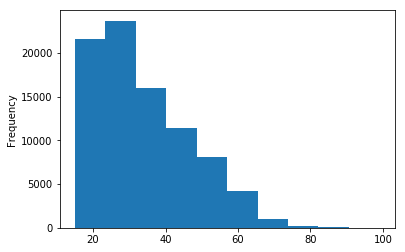

In [70]:
# histograms are excellent for displaying distributions
ri.driver_age.plot(kind='hist')

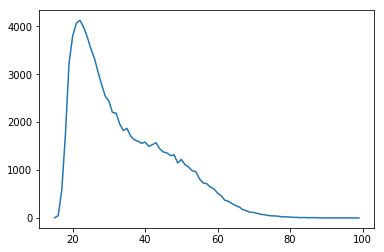

In [71]:
# similar to a histogram
ri.driver_age.value_counts().sort_index().plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002612DB9E048>,
      dtype=object)

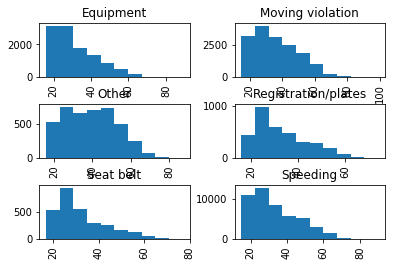

In [72]:
# can't use the plot method
ri.hist('driver_age', by='violation')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002612E84B208>,
      dtype=object)

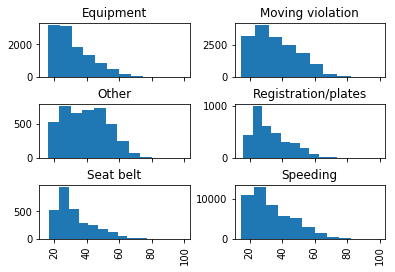

In [73]:
# what changed? how is this better or worse?
ri.hist('driver_age', by='violation', sharex=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002612F208160>,
      dtype=object)

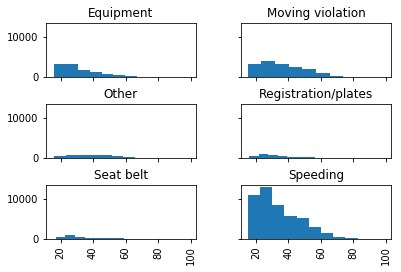

In [74]:
# what changed? how is this better or worse?
ri.hist('driver_age', by='violation', sharex=True, sharey=True)

Lessons:

- Use histograms to show distributions
- Be conscious of axes when using grouped plots

## 13. Pretend you don't have the driver_age column, and create it from driver_age_raw (and call it new_age)

In [75]:
ri.head()

stop_date stop_time driver_gender  driver_age_raw  driver_age driver_race  \
0  2005-01-02     01:55             M          1985.0        20.0       White   
1  2005-01-18     08:15             M          1965.0        40.0       White   
2  2005-01-23     23:15             M          1972.0        33.0       White   
3  2005-02-20     17:15             M          1986.0        19.0       White   
4  2005-03-14     10:00             F          1984.0        21.0       White   

      violation_raw violation  search_conducted search_type   stop_outcome  \
0          Speeding  Speeding             False         NaN       Citation   
1          Speeding  Speeding             False         NaN       Citation   
2          Speeding  Speeding             False         NaN       Citation   
3  Call for Service     Other             False         NaN  Arrest Driver   
4          Speeding  Speeding             False         NaN       Citation   

  is_arrested stop_duration  drugs_related_stop frisk       stop_datetime  \
0       False      0-15 Min               False   NaN 2005-01-02 01:55:00   
1       False      0-15 Min               False   NaN 2005-01-18 08:15:00   
2       False      0-15 Min               False   NaN 2005-01-23 23:15:00   
3        True     16-30 Min               False   NaN 2005-02-20 17:15:00   
4       False      0-15 Min               False   NaN 2005-03-14 10:00:00   

   stop_minutes  
0           8.0  
1           8.0  
2           8.0  
3          23.0  
4           8.0

In [76]:
# appears to be year of stop_date minus driver_age_raw
ri.tail()

stop_date stop_time driver_gender  driver_age_raw  driver_age  \
91736  2015-12-31     20:27             M          1986.0        29.0   
91737  2015-12-31     20:35             F          1982.0        33.0   
91738  2015-12-31     20:45             M          1992.0        23.0   
91739  2015-12-31     21:42             M          1993.0        22.0   
91740  2015-12-31     22:46             M          1959.0        56.0   

      driver_race                   violation_raw         violation  \
91736       White                        Speeding          Speeding   
91737       White  Equipment/Inspection Violation         Equipment   
91738       White         Other Traffic Violation  Moving violation   
91739       White                        Speeding          Speeding   
91740    Hispanic                        Speeding          Speeding   

       search_conducted search_type stop_outcome is_arrested stop_duration  \
91736             False         NaN      Warning       False      0-15 Min   
91737             False         NaN      Warning       False      0-15 Min   
91738             False         NaN      Warning       False      0-15 Min   
91739             False         NaN     Citation       False      0-15 Min   
91740             False         NaN     Citation       False      0-15 Min   

       drugs_related_stop frisk       stop_datetime  stop_minutes  
91736               False   NaN 2015-12-31 20:27:00           8.0  
91737               False   NaN 2015-12-31 20:35:00           8.0  
91738               False   NaN 2015-12-31 20:45:00           8.0  
91739               False   NaN 2015-12-31 21:42:00           8.0  
91740               False   NaN 2015-12-31 22:46:00           8.0

In [77]:
ri['new_age'] = ri.stop_datetime.dt.year - ri.driver_age_raw

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002612F4BD3C8>,
      dtype=object)

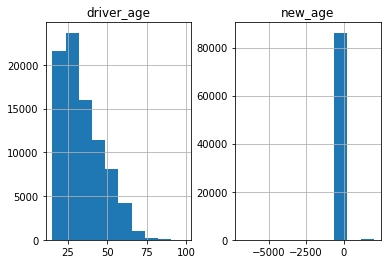

In [78]:
# compare the distributions
ri[['driver_age', 'new_age']].hist()

In [79]:
# compare the summary statistics (focus on min and max)
ri[['driver_age', 'new_age']].describe()

driver_age       new_age
count  86120.000000  86414.000000
mean      34.011333     39.784294
std       12.738564    110.822145
min       15.000000  -6794.000000
25%       23.000000     24.000000
50%       31.000000     31.000000
75%       43.000000     43.000000
max       99.000000   2015.000000

In [80]:
# calculate how many ages are outside that range
ri[(ri.new_age < 15) | (ri.new_age > 99)].shape

(294, 18)

In [81]:
# raw data given to the researchers
ri.driver_age_raw.isnull().sum()

5327

In [82]:
# age computed by the researchers (has more missing values)
ri.driver_age.isnull().sum()

5621

In [83]:
# what does this tell us? researchers set driver_age as missing if less than 15 or more than 99
5621-5327

294

In [84]:
# driver_age_raw NOT MISSING, driver_age MISSING
ri[(ri.driver_age_raw.notnull()) & (ri.driver_age.isnull())].head()

stop_date stop_time driver_gender  driver_age_raw  driver_age  \
146  2005-10-05     08:50             M             0.0         NaN   
281  2005-10-10     12:05             F             0.0         NaN   
331  2005-10-12     07:50             M             0.0         NaN   
414  2005-10-17     08:32             M          2005.0         NaN   
455  2005-10-18     18:30             F             0.0         NaN   

    driver_race             violation_raw         violation  search_conducted  \
146       White   Other Traffic Violation  Moving violation             False   
281       White   Other Traffic Violation  Moving violation             False   
331       White  Motorist Assist/Courtesy             Other             False   
414       White   Other Traffic Violation  Moving violation             False   
455       White                  Speeding          Speeding             False   

    search_type stop_outcome is_arrested stop_duration  drugs_related_stop  \
146         NaN     Citation       False      0-15 Min               False   
281         NaN      Warning       False      0-15 Min               False   
331         NaN    No Action       False      0-15 Min               False   
414         NaN     Citation       False      0-15 Min               False   
455         NaN      Warning       False      0-15 Min               False   

    frisk       stop_datetime  stop_minutes  new_age  
146   NaN 2005-10-05 08:50:00           8.0   2005.0  
281   NaN 2005-10-10 12:05:00           8.0   2005.0  
331   NaN 2005-10-12 07:50:00           8.0   2005.0  
414   NaN 2005-10-17 08:32:00           8.0      0.0  
455   NaN 2005-10-18 18:30:00           8.0   2005.0

In [85]:
# set the ages outside that range as missing
ri.loc[(ri.new_age < 15) | (ri.new_age > 99), 'new_age'] = np.nan

In [86]:
ri.new_age.equals(ri.driver_age)

True

Lessons:

- Don't assume that the head and tail are representative of the data
- Columns with missing values may still have bad data (driver_age_raw)
- Data cleaning sometimes involves guessing (driver_age)
- Use histograms for a sanity check